In [1]:
import pandas as pd
import numpy as np
import sqlite3
import os

In [2]:
# import csv file
df = pd.read_csv('Sample-Superstore_cleaned.csv', sep=',', encoding='utf-8', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_id                9994 non-null   int64  
 1   order_id              9994 non-null   object 
 2   order_date            9994 non-null   object 
 3   year                  9994 non-null   int64  
 4   month                 9994 non-null   int64  
 5   day_of_week           9994 non-null   object 
 6   ship_date             9994 non-null   object 
 7   ship_mode             9994 non-null   object 
 8   customer_id           9994 non-null   object 
 9   customer_name         9994 non-null   object 
 10  segment               9994 non-null   object 
 11  customer_address_key  9994 non-null   object 
 12  country               9994 non-null   object 
 13  city                  9994 non-null   object 
 14  state                 9994 non-null   object 
 15  postal_code          

FURTHER ENRICHING OF BASE DATA

In [3]:
# Change ship_date to datetime format
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%Y-%m-%d')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                9994 non-null   int64         
 1   order_id              9994 non-null   object        
 2   order_date            9994 non-null   datetime64[ns]
 3   year                  9994 non-null   int64         
 4   month                 9994 non-null   int64         
 5   day_of_week           9994 non-null   object        
 6   ship_date             9994 non-null   datetime64[ns]
 7   ship_mode             9994 non-null   object        
 8   customer_id           9994 non-null   object        
 9   customer_name         9994 non-null   object        
 10  segment               9994 non-null   object        
 11  customer_address_key  9994 non-null   object        
 12  country               9994 non-null   object        
 13  city              

In [4]:
# generate new column 'sales_without_discount' by taking per row the value in 'price' multiply with value in 'discount' and multiply with value in 'quantity' and then add value in 'sales' 
df['sales_without_discount'] = (df['price'] * df['discount'] * df['quantity']) + df['sales']

# Target : get purchase price for each row-id
# Step 1: Take number in 'profit' and divide by number in 'quantity'
# Step 2: Take number in 'discount' and multiply by number in 'price'
# Step 3: Add the result of Step1 and Step 2 together AND multiply this sum with value in 'quantity', then save result as value in new column 'profit_without_discount'
# Step 4: Add the result of Step1 and Step 2 together AND substract it from value in column 'price', then save the result in a new column 'purchase_price' and insert this column after existing column 'price'  
# Step 1: Calculate profit per unit
profit_per_unit = df['profit'] / df['quantity']

# Step 2: Calculate discount impact per unit
discount_impact_per_unit = df['discount'] * df['price']

# Step 3: Calculate profit_without_discount
df['profit_without_discount'] = (profit_per_unit + discount_impact_per_unit) * df['quantity']

# Step 4: Calculate purchase_price and insert it after 'price' column
df.insert(df.columns.get_loc('price') + 1, 'purchase_price', df['price'] - (profit_per_unit + discount_impact_per_unit))

# Add a new column at the end of the dataframe with Y/N values if discount is greater than 0
df['discounted_sale'] = np.where(df['discount'] > 0, 'Y', 'N')

df

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,product_name,price,purchase_price,sales,quantity,discount,profit,sales_without_discount,profit_without_discount,discounted_sale
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,Bush Somerset Collection Bookcase,130.98,110.0232,261.9600,2,0.00,41.9136,261.96,41.9136,N
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,170.7860,731.9400,3,0.00,219.5820,731.94,219.5820,N
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,Self-Adhesive Address Labels for Typewriters b...,7.31,3.8743,14.6200,2,0.00,6.8714,14.62,6.8714,N
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Bretford CR4500 Series Slim Rectangular Table,348.21,268.1217,957.5775,5,0.45,-383.0310,1741.05,400.4415,Y
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Eldon Fold 'N Roll Cart System,13.98,9.9258,22.3680,2,0.20,2.5164,27.96,8.1084,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014,1,Tuesday,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,...,Ultra Door Pull Handle,10.52,7.0484,25.2480,3,0.20,4.1028,31.56,10.4148,Y
9990,9991,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.98,38.1634,91.9600,2,0.00,15.6332,91.96,15.6332,N
9991,9992,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Aastra 57i VoIP phone,161.61,119.5914,258.5760,2,0.20,19.3932,323.22,84.0372,Y
9992,9993,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",7.40,4.0700,29.6000,4,0.00,13.3200,29.60,13.3200,N


In [5]:
# rename existing column 'price' to 'selling_price'
df.rename(columns={'price': 'selling_price'}, inplace=True)


df

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,product_name,selling_price,purchase_price,sales,quantity,discount,profit,sales_without_discount,profit_without_discount,discounted_sale
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,Bush Somerset Collection Bookcase,130.98,110.0232,261.9600,2,0.00,41.9136,261.96,41.9136,N
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,170.7860,731.9400,3,0.00,219.5820,731.94,219.5820,N
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,Self-Adhesive Address Labels for Typewriters b...,7.31,3.8743,14.6200,2,0.00,6.8714,14.62,6.8714,N
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Bretford CR4500 Series Slim Rectangular Table,348.21,268.1217,957.5775,5,0.45,-383.0310,1741.05,400.4415,Y
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Eldon Fold 'N Roll Cart System,13.98,9.9258,22.3680,2,0.20,2.5164,27.96,8.1084,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014,1,Tuesday,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,...,Ultra Door Pull Handle,10.52,7.0484,25.2480,3,0.20,4.1028,31.56,10.4148,Y
9990,9991,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.98,38.1634,91.9600,2,0.00,15.6332,91.96,15.6332,N
9991,9992,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Aastra 57i VoIP phone,161.61,119.5914,258.5760,2,0.20,19.3932,323.22,84.0372,Y
9992,9993,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",7.40,4.0700,29.6000,4,0.00,13.3200,29.60,13.3200,N


In [6]:
# export the dataframe to a new csv file
# df.to_csv('Sample-Superstore_cleaned2.csv', index=False)

GRAPHICAL ANALYSIS AS PART OF EDA

In [7]:
# Show the average discount per segment
avg_discount_per_segment = df.groupby('segment')['discount'].mean().reset_index()
avg_discount_per_segment.rename(columns={'discount': 'avg_discount'}, inplace=True)
avg_discount_per_segment

,segment,avg_discount
0,Consumer,0.158141
1,Corporate,0.158228
2,Home Office,0.147128


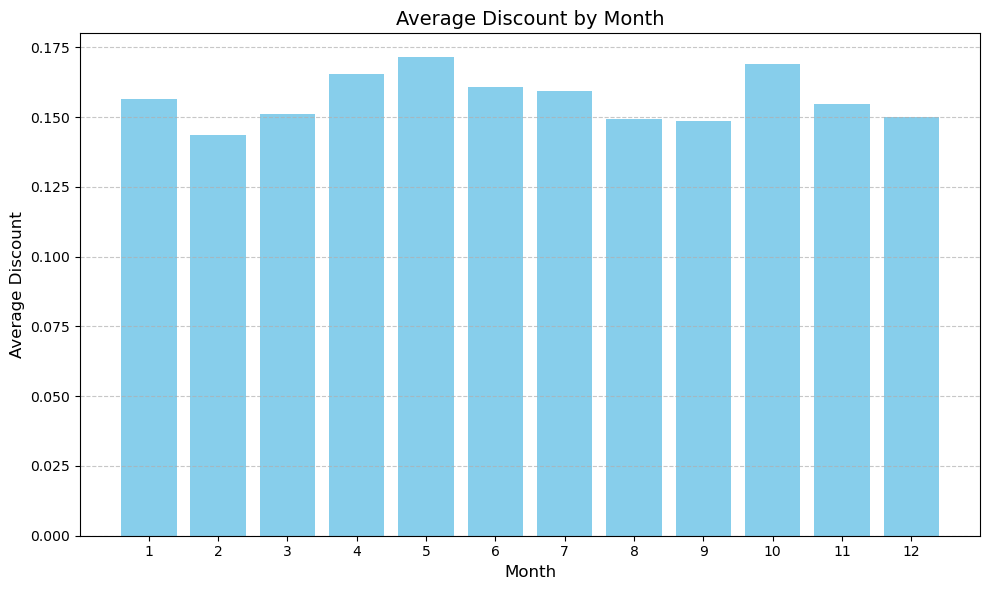

In [8]:
# Show the average discount by month
df['month'] = df['ship_date'].dt.month
avg_discount_by_month = df.groupby('month')['discount'].mean().reset_index()
avg_discount_by_month.rename(columns={'discount': 'avg_discount'}, inplace=True)
avg_discount_by_month

# present as histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_discount_by_month['month'], avg_discount_by_month['avg_discount'], color='skyblue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Discount', fontsize=12)
plt.title('Average Discount by Month', fontsize=14)
plt.xticks(avg_discount_by_month['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

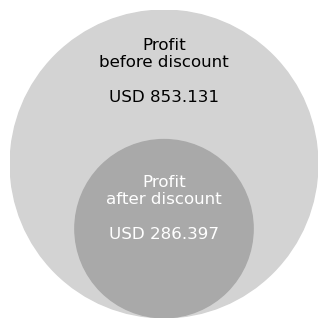

In [9]:
# Create a chart with two circles
# Circle 1 = radius of circle should us total sum of all values in column 'profit_without_discount'
# Circle 2 = radius of circle should us total sum of all values in column 'profit'
# I want Circle 1 to be on the back. Circle 2 should be inside Circle 1. At the bottom middle circle 2 should not intersect with outer line of circle 1. Circle 2 should be a bit away from outer line. Also Circle 2 and circle 1 should be aligned horizontically.
# Circle 2 should have color darkgrey. Circle 1 should have color lightgrey.

import matplotlib.pyplot as plt

# Calculate the radii of the circles
radius_circle1 = df['profit_without_discount'].sum() ** 0.5
radius_circle2 = df['profit'].sum() ** 0.5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Add Circle 1 (light grey, in the back)
circle1 = plt.Circle((0, 0), radius_circle1, color='lightgrey', zorder=1)
ax.add_artist(circle1)

# Add Circle 2 (dark grey, inside Circle 1)
circle2 = plt.Circle((0, -radius_circle1 + radius_circle2 + 0.1), radius_circle2, color='darkgrey', zorder=2)
ax.add_artist(circle2)

# Set limits and aspect ratio
ax.set_xlim(-radius_circle1 - 1, radius_circle1 + 1)
ax.set_ylim(-radius_circle1 - 1, radius_circle1 + 1)
ax.set_aspect('equal')
# Add labels inside the circles
ax.text(0, radius_circle2 * -0.5, 
    f"Profit\nafter discount\n\nUSD {int(df['profit'].sum()):,}".replace(",", "."), 
    color='white', ha='center', va='center', fontsize=12, zorder=3)
ax.text(0, radius_circle1 * 0.6, 
    f"Profit\nbefore discount\n\nUSD {int(df['profit_without_discount'].sum()):,}".replace(",", "."), 
    color='black', ha='center', va='center', fontsize=12, zorder=2)
# Remove axes for better visualization
ax.axis('off')

# Show the plot
plt.show()

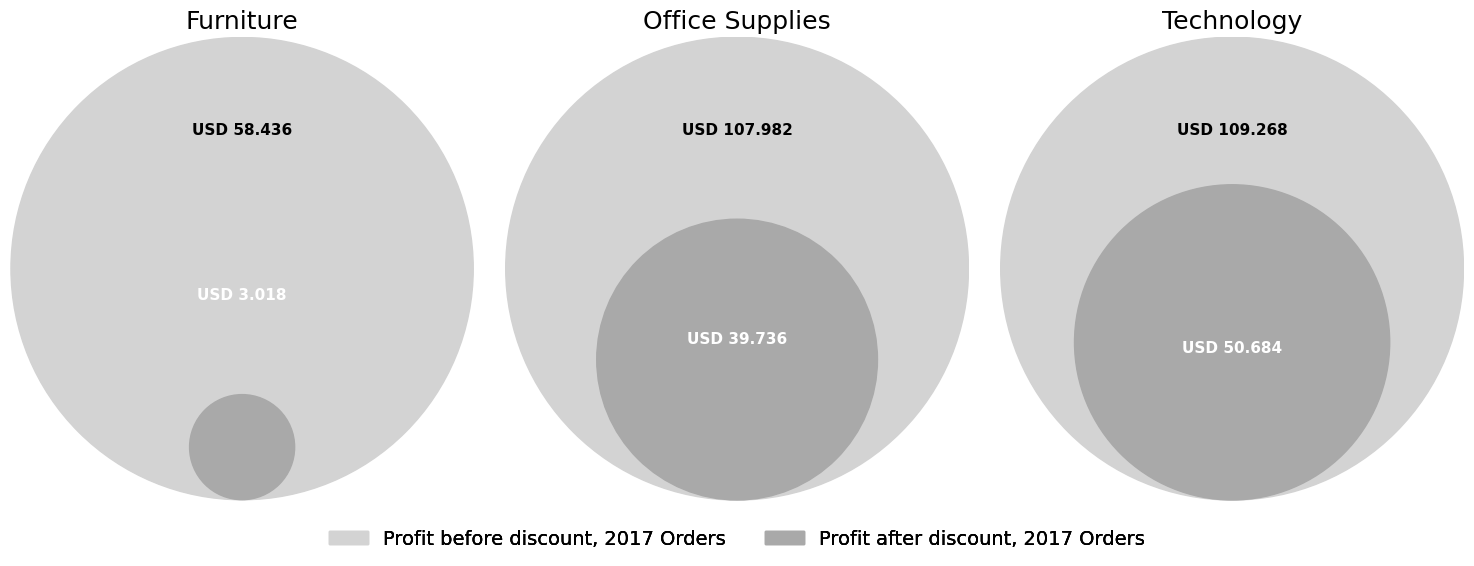

In [10]:
import matplotlib.pyplot as plt

# Limit data from dataframe df to year = '2017'
df_2017 = df[df['year'] == 2017]

# Define the main categories
categories = ['Furniture', 'Office Supplies', 'Technology']

# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each category and create a separate plot
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = df_2017[df_2017['category'] == category]
    
    # Calculate the radii of the circles
    radius_circle1 = category_data['profit_without_discount'].sum() ** 0.5
    radius_circle2 = category_data['profit'].sum() ** 0.5

    # Add Circle 1 (light grey, in the back)
    circle1 = plt.Circle((0, 0), radius_circle1, color='lightgrey', zorder=1)
    axes[i].add_artist(circle1)

    # Add Circle 2 (dark grey, inside Circle 1)
    circle2 = plt.Circle((0, -radius_circle1 + radius_circle2 + 0.1), radius_circle2, color='darkgrey', zorder=2)
    axes[i].add_artist(circle2)

    # Set limits and aspect ratio
    axes[i].set_xlim(-radius_circle1 - 1, radius_circle1 + 1)
    axes[i].set_ylim(-radius_circle1 - 1, radius_circle1 + 1)
    axes[i].set_aspect('equal')

    # Add labels inside the circles
    axes[i].text(0, radius_circle2 * -0.5, 
        f"USD {int(category_data['profit'].sum()):,}".replace(",", "."), 
        color='white', ha='center', va='center', fontsize=11, fontweight='bold', zorder=3)
    axes[i].text(0, radius_circle1 * 0.6, 
        f"USD {int(category_data['profit_without_discount'].sum()):,}".replace(",", "."), 
        color='black', ha='center', va='center', fontsize=11, fontweight='bold', zorder=2)

    # Remove axes for better visualization
    axes[i].axis('off')

    # Add a title for each subplot
    axes[i].set_title(category, fontsize=18, fontweight='normal', color='black')
    # Add a legend below the whole plot
    fig.legend(['Profit before discount, 2017 Orders', 'Profit after discount, 2017 Orders'], 
               loc='lower center', 
               bbox_to_anchor=(0.5, -0.1), 
               ncol=2, 
               frameon=False, 
               fontsize=14)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

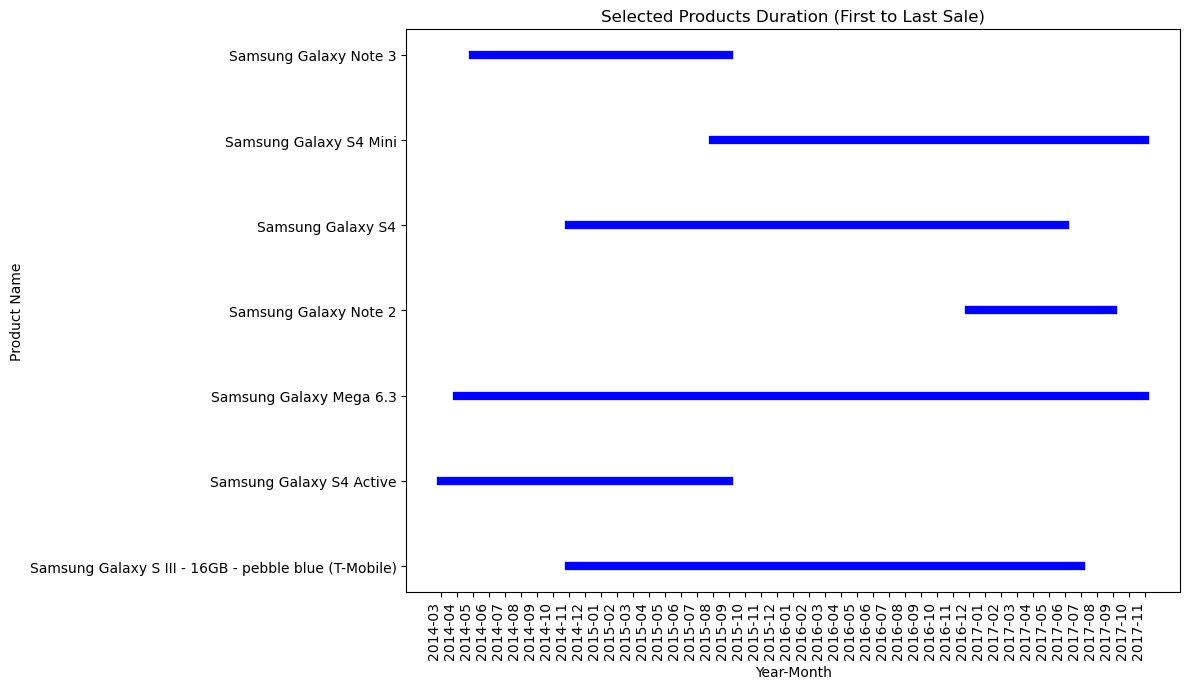

In [11]:
# use dataframe df. Select only those product_id which include 'Xerox' in the product_name
# Then select for each product_id the year&month (format: YYYY-MM) of first entry in order_date and year&month of the last entry in order_date
# Then create a graphical presentation of the date in the following format:
# Y-Axis shows the product name
# X-Axis shows the year&month starting from the first entry in order_date until the last entry in order_date
# the duration between first month and last month for each product_id should be a thick straight line 
# start with the product name that has the earliest entry in first year&month and end with the product name that has the latest entry as first year&month


# Filter dataframe for specific product names
selected_products = [
    "Samsung Galaxy S4",
    "Samsung Galaxy S4 Active",
    "Samsung Galaxy S4 Mini",
    "Samsung Galaxy Note 2",
    "Samsung Galaxy Mega 6.3",
    "Samsung Galaxy S III - 16GB - pebble blue (T-Mobile)",
    "Samsung Galaxy Note 3",
   ]

# Filter dataframe for the selected product names
selected_products_summary = df[df['product_name'].isin(selected_products)].groupby('product_id').agg(
    product_name=('product_name', 'first'),
    first_year_month=('order_date', lambda x: x.min().strftime('%Y-%m')),
    last_year_month=('order_date', lambda x: x.max().strftime('%Y-%m'))
).reset_index()

# # Sort by the first_year_month
# selected_products_summary = selected_products_summary.sort_values(by='first_year_month')

# Generate the plot
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, len(selected_products_summary) * 1.0))

# Generate a range of months from the earliest to the latest
all_months = pd.date_range(
    start=selected_products_summary['first_year_month'].min() + '-01',
    end=selected_products_summary['last_year_month'].max() + '-01',
    freq='MS'
).strftime('%Y-%m').tolist()

# Map product names to y-axis positions
y_positions = range(len(selected_products_summary))

# Plot the duration for each product_id
for i, row in selected_products_summary.iterrows():
    # Ensure the indices for start and end months are correctly calculated
    try:
        start_idx = all_months.index(row['first_year_month'])
        end_idx = all_months.index(row['last_year_month'])
    except ValueError as e:
        print(f"Error with product {row['product_name']}: {e}")
        continue  # Skip this product if there's an issue with the indices

    # Plot the line for the product at the correct y-axis position
    ax.plot([start_idx, end_idx], [y_positions[i], y_positions[i]], linewidth=6, color='blue')

# Set y-axis labels to product names
ax.set_yticks(y_positions)
ax.set_yticklabels(selected_products_summary['product_name'])

# Set x-axis labels to all months
ax.set_xticks(range(len(all_months)))
ax.set_xticklabels(all_months, rotation=90, ha='right')

# Add labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Product Name')
ax.set_title('Selected Products Duration (First to Last Sale)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [12]:
selected_products_summary

,product_id,product_name,first_year_month,last_year_month
0,TEC-PH-10000560,Samsung Galaxy S III - 16GB - pebble blue (T-M...,2014-11,2017-07
1,TEC-PH-10000730,Samsung Galaxy S4 Active,2014-03,2015-09
2,TEC-PH-10001459,Samsung Galaxy Mega 6.3,2014-04,2017-11
3,TEC-PH-10002200,Samsung Galaxy Note 2,2016-12,2017-09
4,TEC-PH-10002584,Samsung Galaxy S4,2014-11,2017-06
5,TEC-PH-10002624,Samsung Galaxy S4 Mini,2015-08,2017-11
6,TEC-PH-10002680,Samsung Galaxy Note 3,2014-05,2015-09


Overall Order Pattern

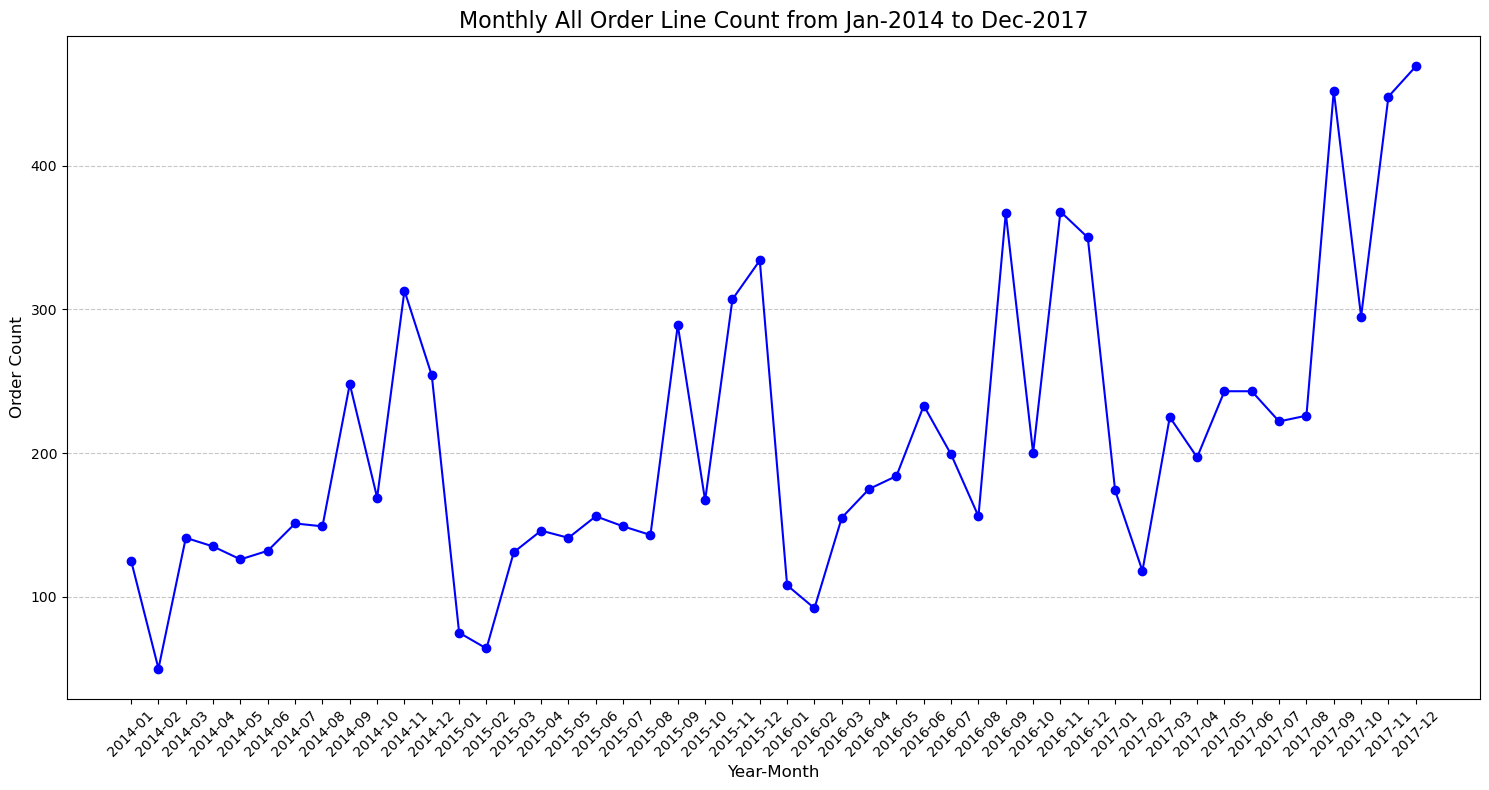

In [13]:
import matplotlib.pyplot as plt


# Group data by year and month, then count orders for each combination
monthly_order_data = df.groupby(['year', 'month'])['row_id'].count().reset_index()

# Create a new column for year-month combination
monthly_order_data['year_month'] = monthly_order_data['year'].astype(str) + '-' + monthly_order_data['month'].astype(str).str.zfill(2)

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(monthly_order_data['year_month'], monthly_order_data['row_id'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Monthly All Order Line Count from Jan-2014 to Dec-2017', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
# Aggregate Data by Category


# Filter data for the year 2017
df_2017 = df[df['year'] == 2017]

# Aggregate data at the category level
aggregated_cat_df = df_2017.groupby(['category', 'month']).agg(
    profit=('profit', 'sum'),
    sales=('sales', 'sum'),
    row_id=('row_id', 'count'),
    row_id_without_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] == 0).sum())),
    row_id_with_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] > 0).sum()))
).reset_index()

# Calculate profit margin
aggregated_cat_df['profit_margin'] = (aggregated_cat_df['profit'] / aggregated_cat_df['sales']) * 100

# check results
aggregated_cat_df

,category,month,profit,sales,row_id,row_id_without_discount,row_id_with_discount,profit_margin
0,Furniture,1,564.0526,8184.5638,32,18,14,6.891664
1,Furniture,2,-312.6843,6989.5484,27,8,19,-4.473598
2,Furniture,3,1045.1066,9127.8200,33,16,17,11.449685
3,Furniture,4,211.0428,9634.7073,46,17,29,2.190443
4,Furniture,5,-124.7036,17657.5864,51,22,29,-0.706232
5,Furniture,6,828.4935,17309.4391,49,14,35,4.786368
6,Furniture,7,221.8176,13493.0110,56,24,32,1.643944
7,Furniture,8,542.4904,13069.8220,40,20,20,4.150710
8,Furniture,9,1375.1801,31734.6120,82,29,53,4.333376
9,Furniture,10,-2478.5195,21194.9742,69,23,46,-11.693902


In [15]:
# Aggregate Data by Subcategory

# Filter data for the year 2017
df_2017 = df[df['year'] == 2017]

# Aggregate data at the category level
aggregated_subcat_df = df_2017.groupby(['category', 'subcategory', 'month']).agg(
    profit=('profit', 'sum'),
    sales=('sales', 'sum'),
    row_id=('row_id', 'count'),
    row_id_without_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] == 0).sum())),
    row_id_with_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] > 0).sum()))
).reset_index()

# Calculate profit margin
aggregated_subcat_df['profit_margin'] = (aggregated_subcat_df['profit'] / aggregated_subcat_df['sales']) * 100

# check results
aggregated_subcat_df

,category,subcategory,month,profit,sales,row_id,row_id_without_discount,row_id_with_discount,profit_margin
0,Furniture,Bookcases,1,72.4522,699.9088,4,2,2,10.351663
1,Furniture,Bookcases,2,109.0626,893.8034,4,1,3,12.202079
2,Furniture,Bookcases,3,78.4724,931.4480,3,1,2,8.424775
3,Furniture,Bookcases,4,3.5554,2986.9028,8,0,8,0.119033
4,Furniture,Bookcases,5,-202.7300,3631.7724,8,3,5,-5.582123
...,...,...,...,...,...,...,...,...,...
197,Technology,Phones,8,1489.5424,11442.8800,21,6,15,13.017198
198,Technology,Phones,9,1537.4119,16043.4120,38,14,24,9.582824
199,Technology,Phones,10,1206.5357,8092.3900,28,7,21,14.909510
200,Technology,Phones,11,1355.5988,13438.9540,40,11,29,10.087086


          category  profit_margin
0        Furniture       1.401379
1  Office Supplies      16.146720
2       Technology      18.652377


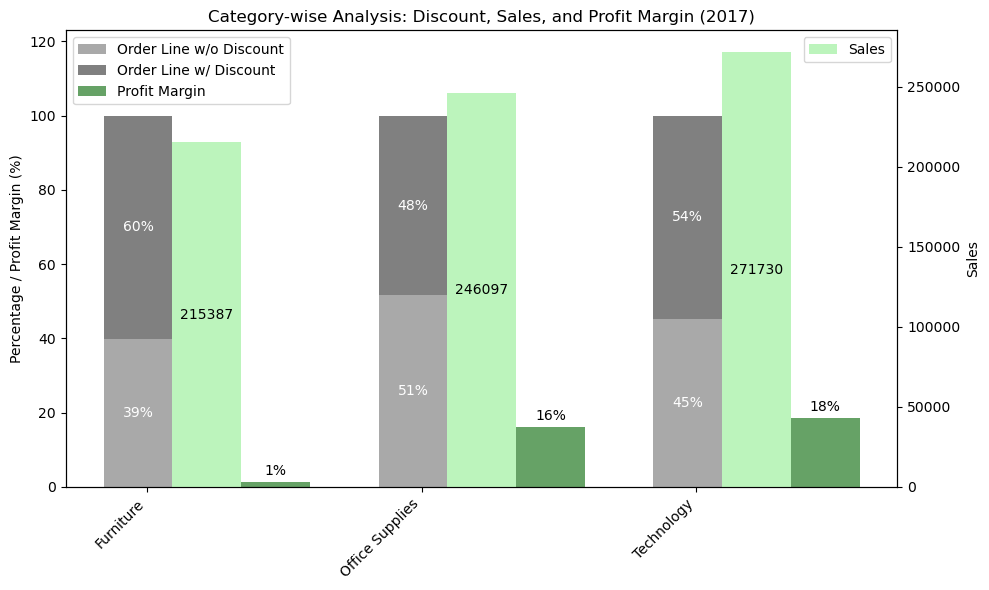

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Aggregate data at the year and category level
aggregated_yearly = aggregated_cat_df.groupby('category').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_yearly['profit_margin'] = (aggregated_yearly['profit'] / aggregated_yearly['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_yearly[['category', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_yearly['without_discount_pct'] = (aggregated_yearly['row_id_without_discount'] / aggregated_yearly['row_id']) * 100
aggregated_yearly['with_discount_pct'] = (aggregated_yearly['row_id_with_discount'] / aggregated_yearly['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
categories = aggregated_yearly['category']
x = np.arange(len(categories))

ax1.bar(x, aggregated_yearly['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_yearly['with_discount_pct'], bar_width, bottom=aggregated_yearly['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_yearly['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_yearly['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Category-wise Analysis: Discount, Sales, and Profit Margin (2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)
# ax2.set_ylim(0, aggregated_yearly['sales'].max() * 1.2)

# # Add grid lines for better readability
# ax1.yaxis.grid(True, linestyle='--', alpha=0.7)


# Add values inside the bars for discount percentages
for i, category in enumerate(categories):
    ax1.text(x[i], aggregated_yearly['without_discount_pct'][i] / 2, 
             f"{int(aggregated_yearly['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)
    ax1.text(x[i], aggregated_yearly['without_discount_pct'][i] + aggregated_yearly['with_discount_pct'][i] / 2, 
             f"{int(aggregated_yearly['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)

# Add values inside the bars for sales
for i, category in enumerate(categories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_yearly['sales'][i] / 2, 
             f"{int(aggregated_yearly['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10)

# Add values on top of the bars for profit margin
for i, category in enumerate(categories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_yearly['profit_margin'][i] + 1, 
             f"{int(aggregated_yearly['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10)


plt.tight_layout()
plt.show()

   subcategory  profit_margin
0  Accessories      26.144024
1      Copiers      39.796556
2     Machines      -6.589131
3       Phones      12.197894


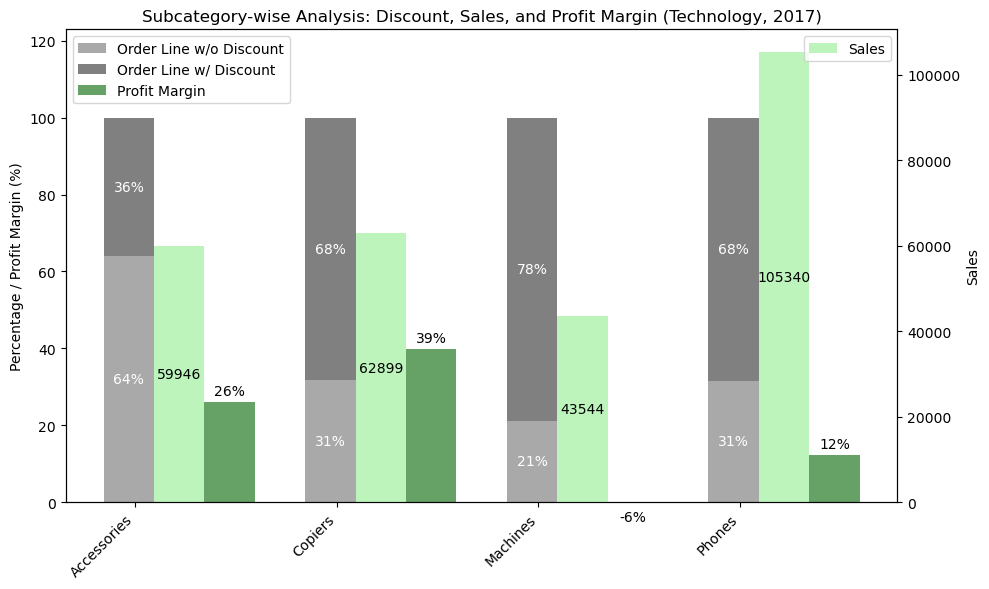

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Limit data to category 'Technology'
technology_data = aggregated_subcat_df[aggregated_subcat_df['category'] == 'Technology']

# Aggregate data at the subcategory level
aggregated_technology = technology_data.groupby('subcategory').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_technology['profit_margin'] = (aggregated_technology['profit'] / aggregated_technology['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_technology[['subcategory', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_technology['without_discount_pct'] = (aggregated_technology['row_id_without_discount'] / aggregated_technology['row_id']) * 100
aggregated_technology['with_discount_pct'] = (aggregated_technology['row_id_with_discount'] / aggregated_technology['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
subcategories = aggregated_technology['subcategory']
x = np.arange(len(subcategories))

ax1.bar(x, aggregated_technology['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_technology['with_discount_pct'], bar_width, bottom=aggregated_technology['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_technology['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_technology['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(subcategories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Subcategory-wise Analysis: Discount, Sales, and Profit Margin (Technology, 2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)

# Add values inside the bars for discount percentages
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] + aggregated_technology['with_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)

# Add values inside the bars for sales
for i, subcategory in enumerate(subcategories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_technology['sales'][i] / 2, 
             f"{int(aggregated_technology['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10)

# Add values on top of the bars for profit margin
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_technology['profit_margin'][i] + 1, 
             f"{int(aggregated_technology['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


  subcategory  profit_margin
0  Appliances      18.322456
1         Art      25.069909
2     Binders      10.537090
3   Envelopes      42.673595
4   Fasteners      35.558656
5      Labels      45.182898
6       Paper      43.477039
7     Storage      10.624360
8    Supplies      -5.952323


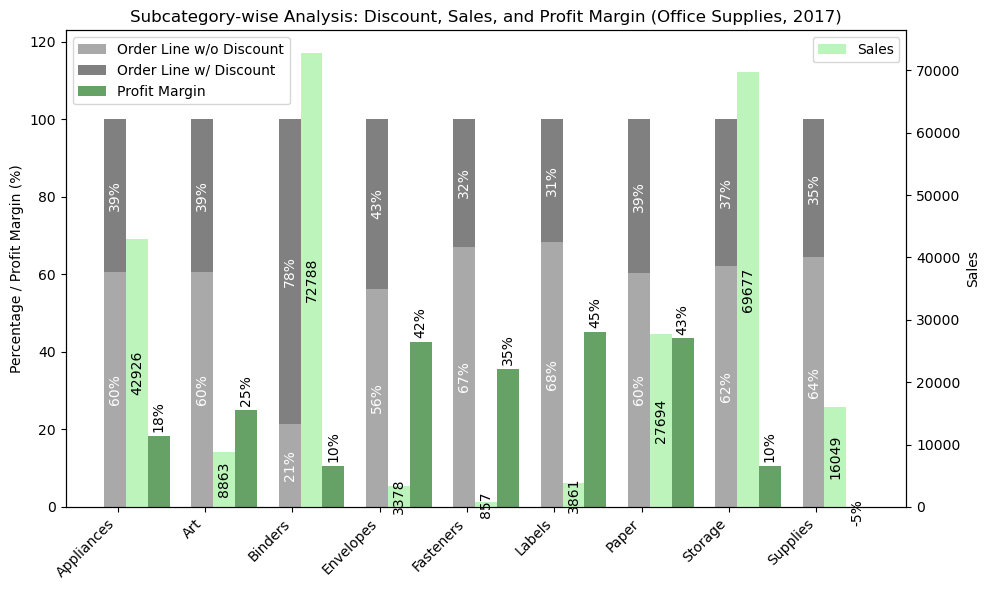

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Limit data to category 'Office Supplies'
technology_data = aggregated_subcat_df[aggregated_subcat_df['category'] == 'Office Supplies']

# Aggregate data at the subcategory level
aggregated_technology = technology_data.groupby('subcategory').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_technology['profit_margin'] = (aggregated_technology['profit'] / aggregated_technology['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_technology[['subcategory', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_technology['without_discount_pct'] = (aggregated_technology['row_id_without_discount'] / aggregated_technology['row_id']) * 100
aggregated_technology['with_discount_pct'] = (aggregated_technology['row_id_with_discount'] / aggregated_technology['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
subcategories = aggregated_technology['subcategory']
x = np.arange(len(subcategories))

ax1.bar(x, aggregated_technology['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_technology['with_discount_pct'], bar_width, bottom=aggregated_technology['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_technology['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_technology['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(subcategories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Subcategory-wise Analysis: Discount, Sales, and Profit Margin (Office Supplies, 2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)

# Add values inside the bars for discount percentages
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] + aggregated_technology['with_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)

# Add values inside the bars for sales
for i, subcategory in enumerate(subcategories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_technology['sales'][i] / 2, 
             f"{int(aggregated_technology['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10, rotation=90)

# Add values on top of the bars for profit margin
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_technology['profit_margin'][i] + 1, 
             f"{int(aggregated_technology['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()


   subcategory  profit_margin
0    Bookcases      -1.943847
1       Chairs       7.999164
2  Furnishings      14.176550
3       Tables     -13.368732


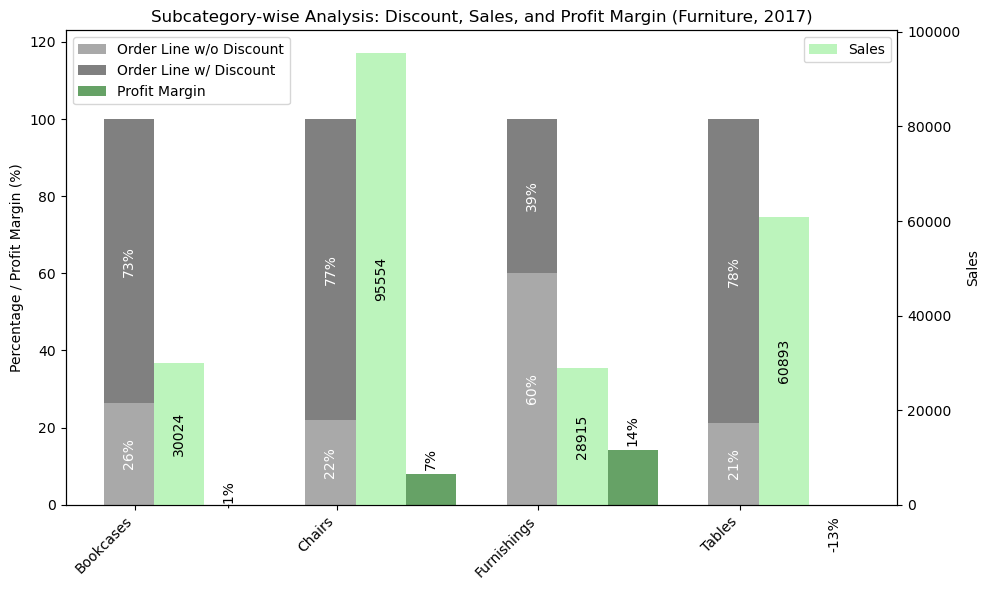

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Limit data to category 'Furniture'
technology_data = aggregated_subcat_df[aggregated_subcat_df['category'] == 'Furniture']

# Aggregate data at the subcategory level
aggregated_technology = technology_data.groupby('subcategory').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_technology['profit_margin'] = (aggregated_technology['profit'] / aggregated_technology['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_technology[['subcategory', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_technology['without_discount_pct'] = (aggregated_technology['row_id_without_discount'] / aggregated_technology['row_id']) * 100
aggregated_technology['with_discount_pct'] = (aggregated_technology['row_id_with_discount'] / aggregated_technology['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
subcategories = aggregated_technology['subcategory']
x = np.arange(len(subcategories))

ax1.bar(x, aggregated_technology['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_technology['with_discount_pct'], bar_width, bottom=aggregated_technology['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_technology['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_technology['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(subcategories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Subcategory-wise Analysis: Discount, Sales, and Profit Margin (Furniture, 2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)

# Add values inside the bars for discount percentages
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] + aggregated_technology['with_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)

# Add values inside the bars for sales
for i, subcategory in enumerate(subcategories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_technology['sales'][i] / 2, 
             f"{int(aggregated_technology['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10, rotation=90)

# Add values on top of the bars for profit margin
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_technology['profit_margin'][i] + 1, 
             f"{int(aggregated_technology['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()


In [20]:
# # Limit data in aggregated_df to category 'Furniture' and year 2017

# import calendar

# import matplotlib.pyplot as plt

# # Ensure the 'year' column exists in aggregated_df
# if 'year' not in aggregated_cat_df.columns:
#     aggregated_cat_df['year'] = df['order_date'].dt.year

# # Create a new column for month abbreviation
# aggregated_cat_df['month_abbr'] = aggregated_cat_df['month'].apply(lambda x: calendar.month_abbr[x][0])

# # Create a new column for year-month combination in the format 'Jan-2014', 'Feb-2014', etc.
# aggregated_cat_df['year_month'] = aggregated_cat_df['month_abbr'] + '-' + aggregated_cat_df['year'].astype(str)

# # Ensure that the combination of 'year_month' and 'category' is unique
# aggregated_cat_df['unique_key'] = aggregated_cat_df['year_month'] + '-' + aggregated_cat_df['category']

# # Aggregate data to ensure uniqueness before pivoting
# aggregated_unique = aggregated_cat_df.groupby(['year_month', 'category']).agg(
#     row_id_without_discount=('row_id_without_discount', 'sum'),
#     row_id_with_discount=('row_id_with_discount', 'sum')
# ).reset_index()

# # Pivot the data to get the values for each unique key
# pivot_data = aggregated_unique.pivot(index='year_month', columns='category', values=['row_id_without_discount', 'row_id_with_discount'])

# # Plot the stacked bar chart
# fig, ax = plt.subplots(figsize=(12, 8))

# # Loop through each year-month and plot the stacked bars
# for i, (year_month, row) in enumerate(pivot_data.iterrows()):
#     ax.bar(i, row['row_id_without_discount'], label='Without Discount', color='lightblue')
#     ax.bar(i, row['row_id_with_discount'], bottom=row['row_id_without_discount'], label='With Discount', color='orange')

# # Customize the plot
# ax.set_xticks(range(len(pivot_data)))
# ax.set_xticklabels(pivot_data.index, rotation=90)
# ax.set_ylabel('Row Count')
# ax.set_title('Stacked Bar Plot: Row Count by Discount Status (2014-2017)')
# ax.legend()

# plt.tight_layout()
# plt.show()

# Not happy with result. I want to see 48 months on the x-Axis and not 4 years.
# I want to see the months in the format 'Jan-2014', 'Feb-2014', ..., 'Dec-2017' on the x-Axis



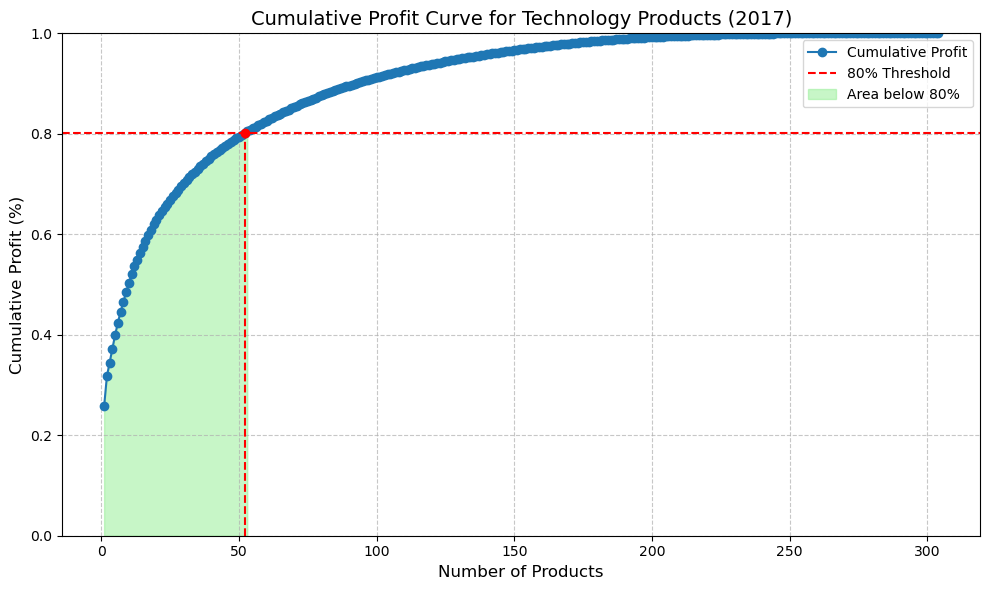

In [21]:
# Show Pareto Chart for Technology Products


# Filter data for the year 2017 and category 'Technology'
technology_data = df_2017[df_2017['category'] == 'Technology']

# Aggregate data at product_id level
aggregated_technology = technology_data.groupby('product_id').agg(
    profit=('profit', 'sum')
).reset_index()

# Sort product_id by descending order of profit
aggregated_technology = aggregated_technology.sort_values(by='profit', ascending=False)

# Default negative profits to zero
aggregated_technology['profit'] = aggregated_technology['profit'].apply(lambda x: max(x, 0))

# Calculate cumulative profit
aggregated_technology['cumulative_profit'] = aggregated_technology['profit'].cumsum()

# Calculate cumulative profit as a percentage of total profit
total_profit = aggregated_technology['profit'].sum()
aggregated_technology['cumulative_profit_pct'] = aggregated_technology['cumulative_profit'] / total_profit

# Generate a table showing product_id, profit, cumulative profit, and cumulative profit percentage
profit_table = aggregated_technology[['product_id', 'profit', 'cumulative_profit', 'cumulative_profit_pct']]

# Display the table sorted in descending order by profit
profit_table_sorted = profit_table.sort_values(by='profit', ascending=False)
profit_table_sorted.reset_index(drop=True, inplace=True)
profit_table_sorted

# Find the point where cumulative profit reaches 80%
threshold_index = aggregated_technology[aggregated_technology['cumulative_profit_pct'] >= 0.8].index[0]
x_threshold = profit_table_sorted[profit_table_sorted['cumulative_profit_pct'] >= 0.8].index[0] + 1  # Adding 1 to convert index to count of products

# Get the corresponding cumulative profit percentage at the threshold
y_threshold = aggregated_technology.loc[threshold_index, 'cumulative_profit_pct']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(aggregated_technology) + 1), aggregated_technology['cumulative_profit_pct'], marker='o', label='Cumulative Profit')

# Add vertical and horizontal lines at the 80% threshold
plt.axhline(y=y_threshold, color='r', linestyle='--', label='80% Threshold')
plt.axvline(x=x_threshold, color='r', linestyle='--', ymax=y_threshold)
plt.scatter(x_threshold, y_threshold, color='red', zorder=5)  # Highlight the intersection point

# Fill the area below the curve up to the 80% threshold
plt.fill_between(range(1, len(aggregated_technology) + 1), 
                 aggregated_technology['cumulative_profit_pct'], 
                 where=(range(1, len(aggregated_technology) + 1) <= x_threshold + 1), 
                 color='lightgreen', alpha=0.5, label='Area below 80%')

# Customize the plot
plt.title('Cumulative Profit Curve for Technology Products (2017)', fontsize=14)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Cumulative Profit (%)', fontsize=12)
plt.ylim(0.0, 1.0)  # Set Y-Axis range from 0.0 to 1.0
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
profit_table_sorted

,product_id,profit,cumulative_profit,cumulative_profit_pct
0,TEC-CO-10004722,15679.9552,15679.9552,0.257473
1,TEC-CO-10001449,3623.9396,19303.8948,0.316980
2,TEC-CO-10003236,1691.9718,20995.8666,0.344763
3,TEC-CO-10001046,1679.9760,22675.8426,0.372349
4,TEC-MA-10003673,1668.2050,24344.0476,0.399742
...,...,...,...,...
299,TEC-PH-10001433,0.0000,60899.4528,1.000000
300,TEC-PH-10004833,0.0000,60899.4528,1.000000
301,TEC-PH-10003092,0.0000,60899.4528,1.000000
302,TEC-PH-10003800,0.0000,60899.4528,1.000000


In [23]:
x_threshold

52

Activate substraction of obsolete products |  if needed

In [24]:
from datetime import datetime

# create a new column 'product_date_first_sale' at the end of dataframe df and set it to the first sale date of each product_id
df['product_date_first_sale'] = df.groupby('product_id')['order_date'].transform('min')
df['product_date_first_sale'] = pd.to_datetime(df['product_date_first_sale'], format='%Y-%m-%d')


# create a new column 'product_date_last_sale' at the end of dataframe df and set it to the last sale date of each product_id
df['product_date_last_sale'] = df.groupby('product_id')['order_date'].transform('max')
df['product_date_last_sale'] = pd.to_datetime(df['product_date_last_sale'], format='%Y-%m-%d')


# create a new column 'product_selling_days' at the end of dataframe df and set it to the number of days between the first sale date and last sale date of each product_id
df['product_selling_days_f2l'] = (df['product_date_last_sale'] - df['product_date_first_sale']).dt.days


# create a new column 'product_selling_days' at the end of dataframe df and set it to the number of days between the first sale date and last sale date of each product_id
df['product_selling_days_f2l_l'] = df.apply(
    lambda row: (row['product_date_last_sale'] - row['product_date_first_sale']).days 
    if row['product_date_last_sale'] != row['product_date_first_sale'] 
    else (min((row['product_date_last_sale'] - row['product_date_first_sale']).days, 180)), 
    axis=1
)


# Assumption: which means 6 months no sales -> product is not selling anymore, i might want to define this by 
# by category at least. in Technology products might become obsolete much quicker.


# Count each occurrence of product_id in the dataframe df and set it to the new column 'product_count'
df['count_orders'] = df.groupby(['product_id', 'order_id'])['order_id'].transform('nunique')
df['count_orders'] = df.groupby('product_id')['count_orders'].transform('sum')


# Count with discounts only
df['count_orders_discount'] = df.apply(
    lambda row: 1 if row['discount'] > 0 else 0, axis=1
)
df['count_orders_discount'] = df.groupby('product_id')['count_orders_discount'].transform('sum')


# add a new columns with calculation by product_id ('count_orders_discount') / ('count_orders')
df['discount_ratio'] = df['count_orders_discount'] / df['count_orders']


# Create a new column 'days_since_last_sale' after column 'product_selling_days_f2l_l'. Use today's date and last sale date to calculate the number of days since last sale. if no value in last sale date, then use first sale date instead.
today = df['order_date'].max()
df['days_since_last_sale'] = df.apply(
    lambda row: (today - row['product_date_last_sale']).days 
    if pd.notnull(row['product_date_last_sale']) 
    else (today - row['product_date_first_sale']).days, 
    axis=1
)


# add a column 'total_quantity' with total of quantity for all records with same product_id
df['total_quantity'] = df.groupby('product_id')['quantity'].transform('sum')


# add a new column 'total_profit' with total of profit for all records with same product_id
df['total_profit'] = df.groupby('product_id')['profit'].transform('sum')


# create a new dataframe df_product
df_product = df[['product_id', 'product_name', 'category', 'subcategory', 'product_date_first_sale', 'product_date_last_sale',
                 'product_selling_days_f2l', 'product_selling_days_f2l_l', 'days_since_last_sale', 
                 'total_quantity', 'count_orders', 'count_orders_discount', 'discount_ratio', 'total_profit'
                 ]].drop_duplicates()


# Calculate sub_category_competition
# Add a new column in df_product which has for each product_id the number of product_id which are in the same subcategory as the product_id itself 


# Add a new column 'sub_category_count' with the number of product_id in the same subcategory
subcategory_counts = df_product.groupby('subcategory')['product_id'].transform('count')
df_product['sub_category_count'] = subcategory_counts.values



# Take out all product_id with product last_sale_date in 2014, 2015 or 2016. Save data of removed products in a new df df_obsolete
df_obsolete = df_product[df_product['product_date_last_sale'].dt.year.isin([2014, 2015, 2016])]
df_product = df_product[~df_product['product_date_last_sale'].dt.year.isin([2014, 2015, 2016])]

# Attention: this removed 347 SKUs from df_product, ~18% of all products



df_product = df_product.sort_values(by=['product_id'])
df_product = df_product.reset_index(drop=True)
df_product.info()
df_product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  1547 non-null   object        
 1   product_name                1547 non-null   object        
 2   category                    1547 non-null   object        
 3   subcategory                 1547 non-null   object        
 4   product_date_first_sale     1547 non-null   datetime64[ns]
 5   product_date_last_sale      1547 non-null   datetime64[ns]
 6   product_selling_days_f2l    1547 non-null   int64         
 7   product_selling_days_f2l_l  1547 non-null   int64         
 8   days_since_last_sale        1547 non-null   int64         
 9   total_quantity              1547 non-null   int64         
 10  count_orders                1547 non-null   int64         
 11  count_orders_discount       1547 non-null   int64       

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,sub_category_count
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,50
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,50
2,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,50
3,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,Furniture,Bookcases,2015-08-16,2017-11-24,831,831,36,22,5,5,1.000000,-767.7436,50
4,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,Furniture,Bookcases,2014-03-30,2017-06-10,1168,1168,203,28,10,7,0.700000,-78.6370,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,TEC-PH-10004897,Mediabridge Sport Armband iPhone 5s,Technology,Phones,2014-12-29,2017-04-01,824,824,273,30,7,4,0.571429,-38.9610,189
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,7,7,1.000000,178.4790,189
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,189
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,189


In [25]:
# Calculate total_sales by product (after discount)
df_product['total_sales'] = df_product['product_id'].map(
    df.groupby('product_id')['sales'].sum()
)

# Calculate buy_sell_ratio by product
df_product['buy_sell_ratio'] = df_product['product_id'].map(
    df.groupby('product_id').apply(lambda x: x['selling_price'].mean() / x['purchase_price'].mean())
)

# Calculate sub_category_competition


df_product

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\1726296218.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('product_id').apply(lambda x: x['selling_price'].mean() / x['purchase_price'].mean())


,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,sub_category_count,total_sales,buy_sell_ratio
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,50,825.1740,1.250000
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,50,1064.6240,1.162791
2,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,50,723.8420,1.190476
3,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,Furniture,Bookcases,2015-08-16,2017-11-24,831,831,36,22,5,5,1.000000,-767.7436,50,2946.3668,1.190476
4,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,Furniture,Bookcases,2014-03-30,2017-06-10,1168,1168,203,28,10,7,0.700000,-78.6370,50,2970.0590,1.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,TEC-PH-10004897,Mediabridge Sport Armband iPhone 5s,Technology,Phones,2014-12-29,2017-04-01,824,824,273,30,7,4,0.571429,-38.9610,189,257.7420,1.010101
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,7,7,1.000000,178.4790,189,1665.8040,1.428571
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,189,516.5300,1.408451
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,189,1085.2380,1.333333


In [26]:
# take df_product and calculate for each product_id the average number of orders per month and as new column 'avg_orders_per_month'
df_product['avg_orders_per_month'] = df_product.apply(
    lambda row: (row['count_orders'] / 4) if (today - row['product_date_first_sale']).days < 120 
    else row['count_orders'] / ((today - row['product_date_first_sale']).days / 30),
    axis=1
)

df_product[df_product['avg_orders_per_month'] >= 0.]

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,sub_category_count,total_sales,buy_sell_ratio,avg_orders_per_month
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,50,825.1740,1.250000,0.250000
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,50,1064.6240,1.162791,0.079787
2,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,50,723.8420,1.190476,0.145161
3,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,Furniture,Bookcases,2015-08-16,2017-11-24,831,831,36,22,5,5,1.000000,-767.7436,50,2946.3668,1.190476,0.173010
4,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,Furniture,Bookcases,2014-03-30,2017-06-10,1168,1168,203,28,10,7,0.700000,-78.6370,50,2970.0590,1.111111,0.218818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,TEC-PH-10004897,Mediabridge Sport Armband iPhone 5s,Technology,Phones,2014-12-29,2017-04-01,824,824,273,30,7,4,0.571429,-38.9610,189,257.7420,1.010101,0.191431
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,7,7,1.000000,178.4790,189,1665.8040,1.428571,0.191781
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,189,516.5300,1.408451,0.070978
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,189,1085.2380,1.333333,0.110051


In [27]:
# generate new column 'avg_profit_per_order' divdiding total_profit by count_orders
# insert column 'avg_profit_per_order' after column 'total_profit'
df_product.insert(
    df_product.columns.get_loc('total_profit') + 1, 
    'avg_profit_per_order', 
    df_product['total_profit'] / df_product['count_orders']
)

df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,sub_category_count,total_sales,buy_sell_ratio,avg_orders_per_month
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,-117.882000,50,825.1740,1.250000,0.250000
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,8.065333,50,1064.6240,1.162791,0.079787
2,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,-22.184867,50,723.8420,1.190476,0.145161
3,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,Furniture,Bookcases,2015-08-16,2017-11-24,831,831,36,22,5,5,1.000000,-767.7436,-153.548720,50,2946.3668,1.190476,0.173010
4,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,Furniture,Bookcases,2014-03-30,2017-06-10,1168,1168,203,28,10,7,0.700000,-78.6370,-7.863700,50,2970.0590,1.111111,0.218818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,TEC-PH-10004897,Mediabridge Sport Armband iPhone 5s,Technology,Phones,2014-12-29,2017-04-01,824,824,273,30,7,4,0.571429,-38.9610,-5.565857,189,257.7420,1.010101,0.191431
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,7,7,1.000000,178.4790,25.497000,189,1665.8040,1.428571,0.191781
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,189,516.5300,1.408451,0.070978
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,189,1085.2380,1.333333,0.110051


# Exclusion of negative profit items 

In [28]:
# show products with avg_profit_per_order < 0
df_product[df_product['avg_profit_per_order'] < 0]

# Drop all rows where avg_profit_per_order < 0 from df_product
df_product = df_product[df_product['avg_profit_per_order'] >= 0]

# 247 products fullfill condition -> Cancel products

In [29]:
# generate new column 'avg_discount_per_order' in df_product using all row-id for one product_id from dataframe df and adding up values in column 'discount' and then dividing by count of row_id for this product_id
# To avoid the SettingWithCopyWarning, use .loc for assignment:
df_product.loc[:, 'avg_discount_per_order'] = df_product['product_id'].map(
    df.groupby('product_id')['discount'].mean()
)

df_product

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\299490853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product.loc[:, 'avg_discount_per_order'] = df_product['product_id'].map(


,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,sub_category_count,total_sales,buy_sell_ratio,avg_orders_per_month,avg_discount_per_order
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,8.065333,50,1064.624,1.162791,0.079787,0.100000
5,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2015-04-16,2017-12-09,968,968,21,22,5,3,0.600000,147.0942,29.418840,50,1119.195,1.315789,0.151668,0.170000
8,FUR-BO-10001619,O'Sullivan Cherrywood Estates Traditional Book...,Furniture,Bookcases,2016-11-24,2017-01-21,58,58,343,6,2,1,0.500000,27.1936,13.596800,50,424.900,1.282051,0.149626,0.100000
10,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,2015-03-01,2017-09-23,937,937,98,26,8,8,1.000000,15.0490,1.881125,50,5492.885,1.428571,0.231884,0.316250
15,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,2014-09-20,2017-06-25,1009,1009,188,27,6,6,1.000000,90.1764,15.029400,50,11046.609,1.234568,0.150376,0.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,TEC-PH-10004896,Nokia Lumia 521 (T-Mobile),Technology,Phones,2014-11-19,2017-03-26,858,858,279,20,5,3,0.600000,83.9720,16.794400,189,515.828,1.388889,0.131926,0.160000
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,7,7,1.000000,178.4790,25.497000,189,1665.804,1.428571,0.191781,0.228571
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,189,516.530,1.408451,0.070978,0.133333
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,189,1085.238,1.333333,0.110051,0.120000


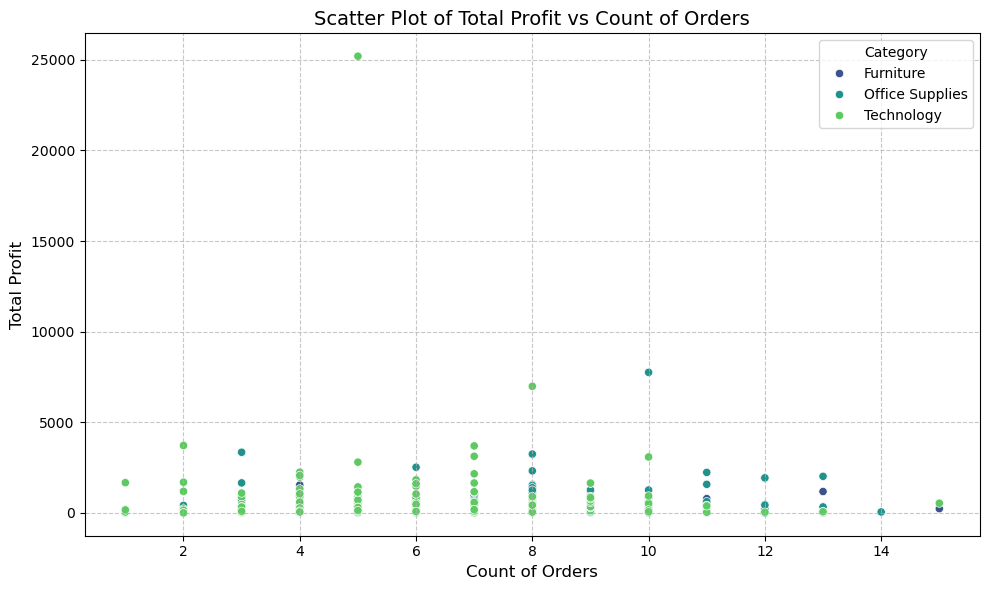

In [30]:
import seaborn as sns

# Prepare a scatter plot with the following columns:
# count_orders (x-Axis)
# total_profit (y-Axis)
# hue = category

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_product, x='count_orders', y='total_profit', hue='category', palette='viridis')

# Customize the plot
plt.title('Scatter Plot of Total Profit vs Count of Orders', fontsize=14)
plt.xlabel('Count of Orders', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


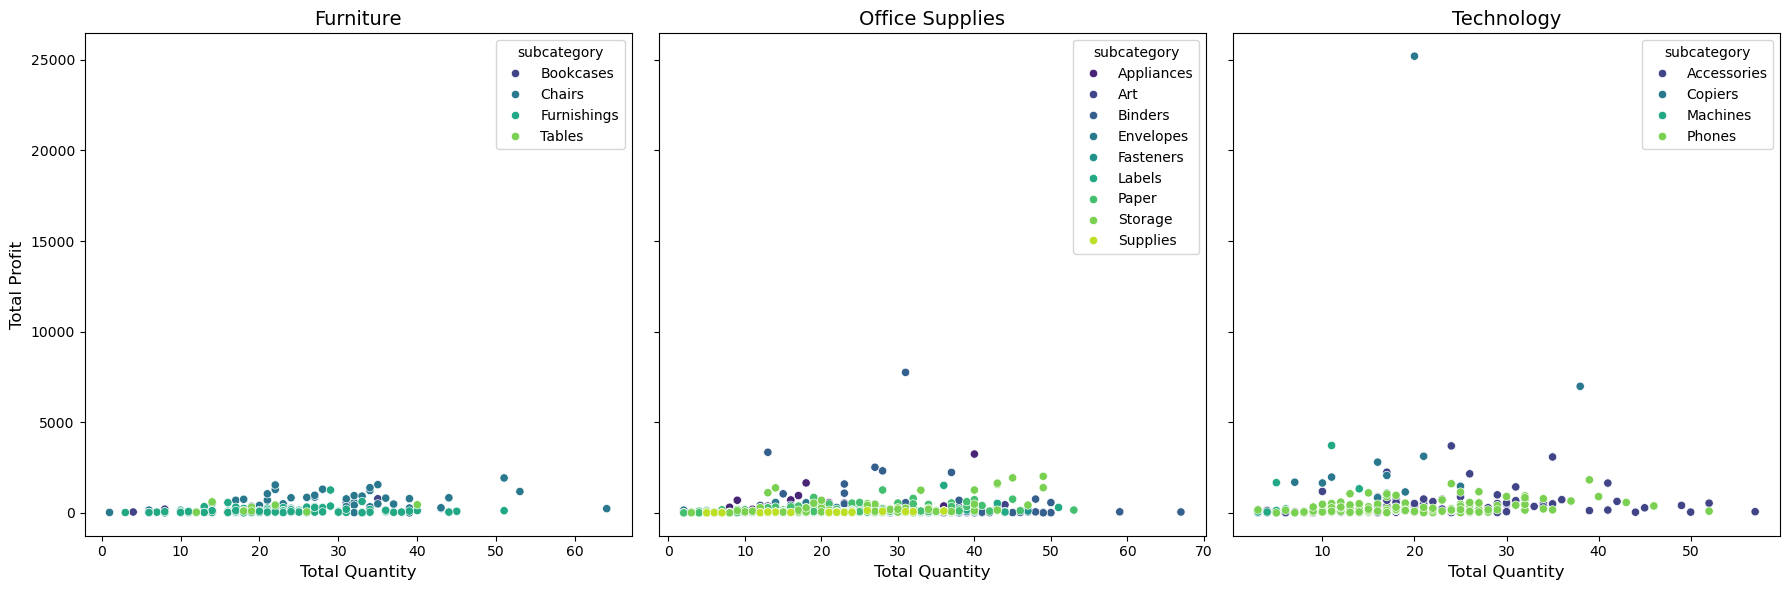

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the categories
categories = ['Furniture', 'Office Supplies', 'Technology']

# Loop through each category and create a scatter plot
for i, category in enumerate(categories):
    sns.scatterplot(
        data=df_product[df_product['category'] == category],
        x='total_quantity',
        y='total_profit',
        hue='subcategory',
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'{category}', fontsize=14)
    axes[i].set_xlabel('Total Quantity', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('Total Profit', fontsize=12)
    else:
        axes[i].set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

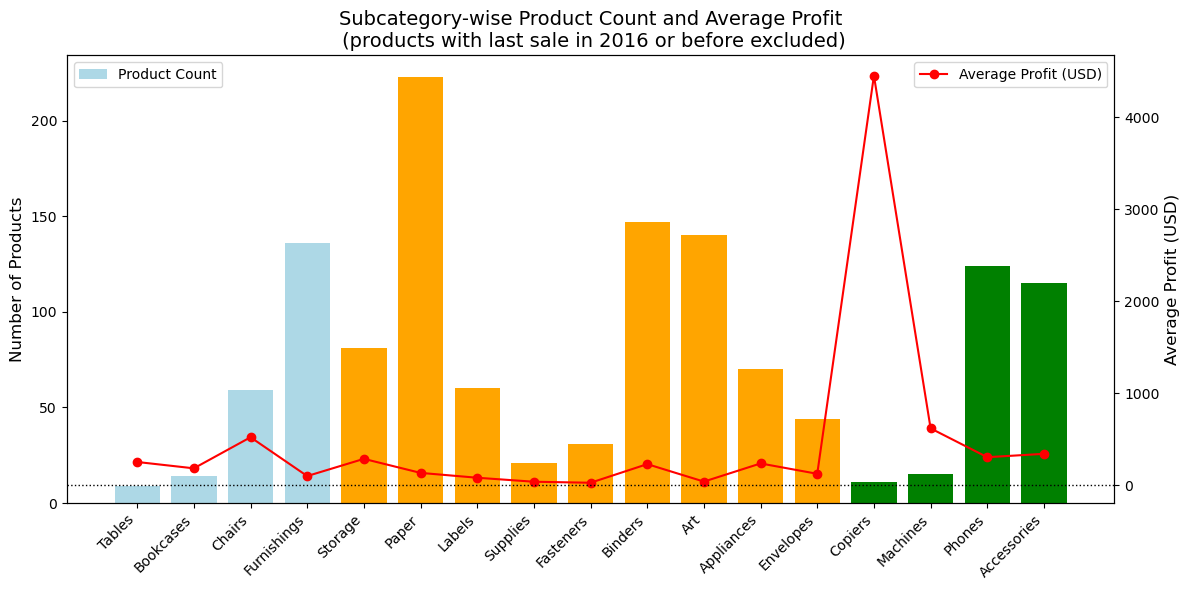

In [32]:
import numpy as np

# Use df_product to calculate the number of products in each subcategory
df_product['subcategory'].value_counts()

# Use df_product to calculate the average profit per product in subcategory
df_product.groupby('subcategory')['total_profit'].mean()

# Show both of the above results in a single plot, value_counts on the left y-Axis and average profit on the right y-Axis
# Start with all subcategories belonging to category 'Furniture', then 'Office_Supplies' and 'Technology'
# When category is changing, then use different color for the bars


import matplotlib.pyplot as plt

# Calculate the number of products in each subcategory
subcategory_counts = df_product['subcategory'].value_counts()

# Calculate the average profit per product in each subcategory
subcategory_avg_profit = df_product.groupby('subcategory')['total_profit'].mean()

# Sort subcategories by category order: Furniture, Office Supplies, Technology
subcategory_order = df_product.groupby('subcategory')['category'].first().sort_values()
subcategory_counts = subcategory_counts[subcategory_order.index]
subcategory_avg_profit = subcategory_avg_profit[subcategory_order.index]

# Define colors for each category
category_colors = {
    'Furniture': 'lightblue',
    'Office Supplies': 'orange',
    'Technology': 'green'
}
subcategory_colors = [category_colors[category] for category in subcategory_order]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for value_counts
x = np.arange(len(subcategory_counts))
ax1.bar(x, subcategory_counts, color=subcategory_colors, label='Product Count')
ax1.set_ylabel('Number of Products', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(subcategory_counts.index, rotation=45, ha='right', fontsize=10)

# Line plot for average profit
ax2 = ax1.twinx()
ax2.plot(x, subcategory_avg_profit, color='red', marker='o', label='Average Profit (USD)')
ax2.set_ylabel('Average Profit (USD)', fontsize=12)
# Add a vertical dotted line at 0 on the right y-Axis
ax2.axhline(0, color='black', linestyle='dotted', linewidth=1)
# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Subcategory-wise Product Count and Average Profit\n (products with last sale in 2016 or before excluded)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\3945899812.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(negative_avg_profit_counts.index, rotation=45, ha='right', fontsize=10)


subcategory
Tables        NaN
Bookcases     NaN
Chairs        NaN
Furnishings   NaN
Storage       NaN
Paper         NaN
Labels        NaN
Supplies      NaN
Fasteners     NaN
Binders       NaN
Art           NaN
Appliances    NaN
Envelopes     NaN
Copiers       NaN
Machines      NaN
Phones        NaN
Accessories   NaN
Name: count, dtype: float64


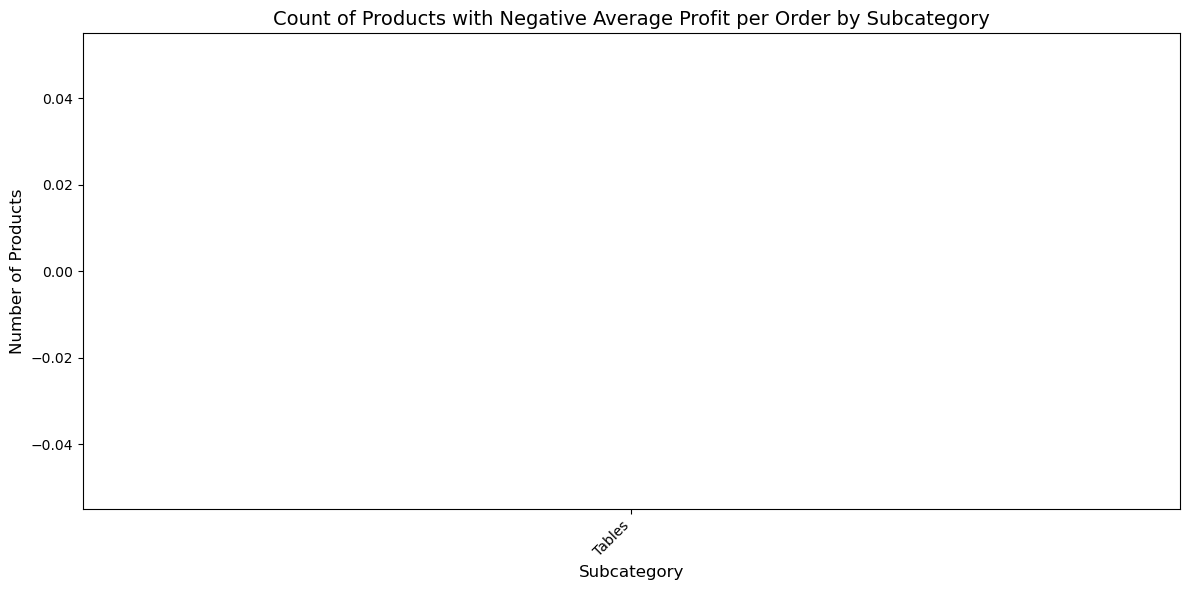

In [33]:
# show as plot the count of products with negative average profit per order per subcategory using a bar chart and same color coding as chart generated in code cell 87
# Filter products with negative average profit per order
negative_avg_profit = df_product[df_product['avg_profit_per_order'] < 0]

# Count the number of products with negative average profit per subcategory
negative_avg_profit_counts = negative_avg_profit['subcategory'].value_counts()

# Ensure the subcategories are in the same order as the previous plot
negative_avg_profit_counts = negative_avg_profit_counts.reindex(subcategory_order.index)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for negative average profit counts
ax.bar(negative_avg_profit_counts.index, negative_avg_profit_counts, color=subcategory_colors)

# Customize the plot
ax.set_ylabel('Number of Products', fontsize=12)
ax.set_xlabel('Subcategory', fontsize=12)
ax.set_title('Count of Products with Negative Average Profit per Order by Subcategory', fontsize=14)
ax.set_xticklabels(negative_avg_profit_counts.index, rotation=45, ha='right', fontsize=10)

print(negative_avg_profit_counts)

# Show the plot
plt.tight_layout()
plt.show()

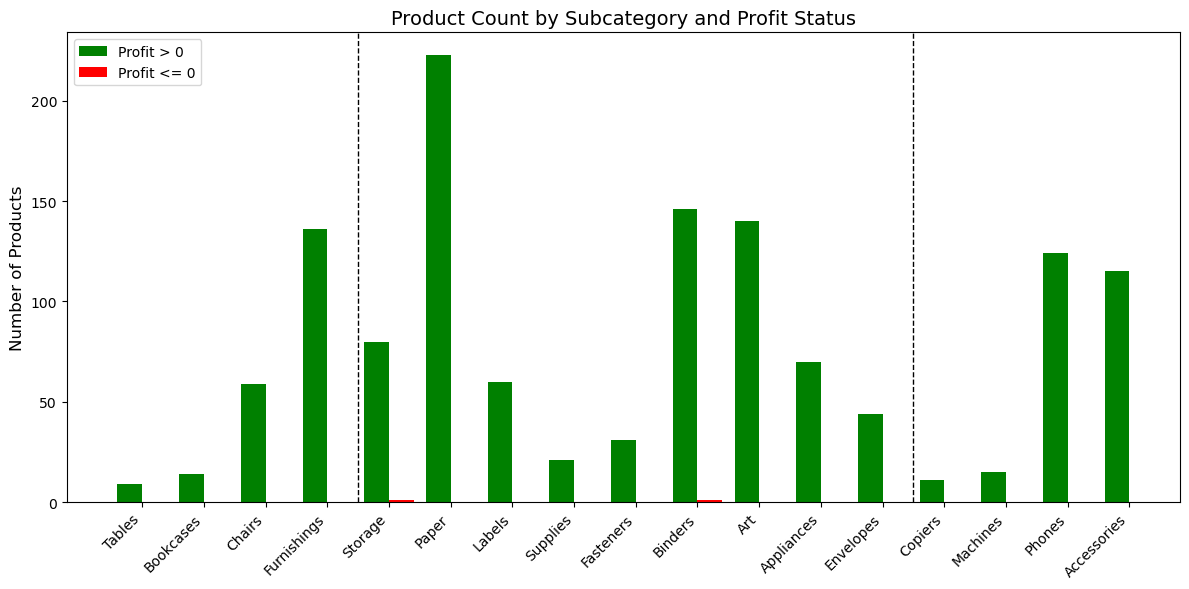

In [34]:
#count number of product_id in df_product which have total_profit > 0
count_positive_profit = df_product[df_product['total_profit'] > 0]['product_id'].nunique()
count_positive_profit

#count number of product_id in df_product which have total_profit <= 0
count_negative_profit = df_product[df_product['total_profit'] <= 0]['product_id'].nunique()
count_negative_profit

# Create a plot which shows by subcategory (in same order as plot direclty above) each time the product_id has a profit > 0 and <= 0
# Calculate counts of product_id with profit > 0 and <= 0 by subcategory
subcategory_positive_profit = df_product[df_product['total_profit'] > 0].groupby('subcategory')['product_id'].nunique()
subcategory_negative_profit = df_product[df_product['total_profit'] <= 0].groupby('subcategory')['product_id'].nunique()

# Ensure the subcategories are in the same order as the previous plot
subcategory_positive_profit = subcategory_positive_profit[subcategory_order.index]
# Ensure the subcategories are grouped by category without reordering
subcategory_negative_profit = subcategory_negative_profit.reindex(subcategory_counts.index)
subcategory_positive_profit = subcategory_positive_profit.reindex(subcategory_counts.index)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for positive and negative profit counts
x = np.arange(len(subcategory_order))
bar_width = 0.4
ax.bar(x - bar_width / 2, subcategory_positive_profit, bar_width, label='Profit > 0', color='green')
ax.bar(x + bar_width / 2, subcategory_negative_profit, bar_width, label='Profit <= 0', color='red')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(subcategory_order.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Number of Products', fontsize=12)
ax.set_title('Product Count by Subcategory and Profit Status', fontsize=14)
ax.legend()

# add vertical line between subcategories furnishings and storage and between envelopes and copiers
# Add vertical lines between specified subcategories
ax.axvline(x=3.5, color='black', linestyle='--', linewidth=1)  # Between Furnishings and Storage
ax.axvline(x=12.5, color='black', linestyle='--', linewidth=1)  # Between Envelopes and Copiers


# Show the plot
plt.tight_layout()
plt.show()

In [35]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,sub_category_count,total_sales,buy_sell_ratio,avg_orders_per_month,avg_discount_per_order
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,8.065333,50,1064.624,1.162791,0.079787,0.100000
5,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2015-04-16,2017-12-09,968,968,21,22,5,3,0.600000,147.0942,29.418840,50,1119.195,1.315789,0.151668,0.170000
8,FUR-BO-10001619,O'Sullivan Cherrywood Estates Traditional Book...,Furniture,Bookcases,2016-11-24,2017-01-21,58,58,343,6,2,1,0.500000,27.1936,13.596800,50,424.900,1.282051,0.149626,0.100000
10,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,2015-03-01,2017-09-23,937,937,98,26,8,8,1.000000,15.0490,1.881125,50,5492.885,1.428571,0.231884,0.316250
15,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,2014-09-20,2017-06-25,1009,1009,188,27,6,6,1.000000,90.1764,15.029400,50,11046.609,1.234568,0.150376,0.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,TEC-PH-10004896,Nokia Lumia 521 (T-Mobile),Technology,Phones,2014-11-19,2017-03-26,858,858,279,20,5,3,0.600000,83.9720,16.794400,189,515.828,1.388889,0.131926,0.160000
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,7,7,1.000000,178.4790,25.497000,189,1665.804,1.428571,0.191781,0.228571
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,189,516.530,1.408451,0.070978,0.133333
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,189,1085.238,1.333333,0.110051,0.120000


Show Age of Product Portfolio  |  by grouping products by their first order

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\589567889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['first_order_month'] = df_product['product_date_first_sale'].dt.month
C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\589567889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['first_order_year'] = df_product['product_date_first_sale'].dt.year
C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\589567889.py:7: SettingWithCopyWarning: 
A value is trying to be s

Last value of cumulative growth: 1300


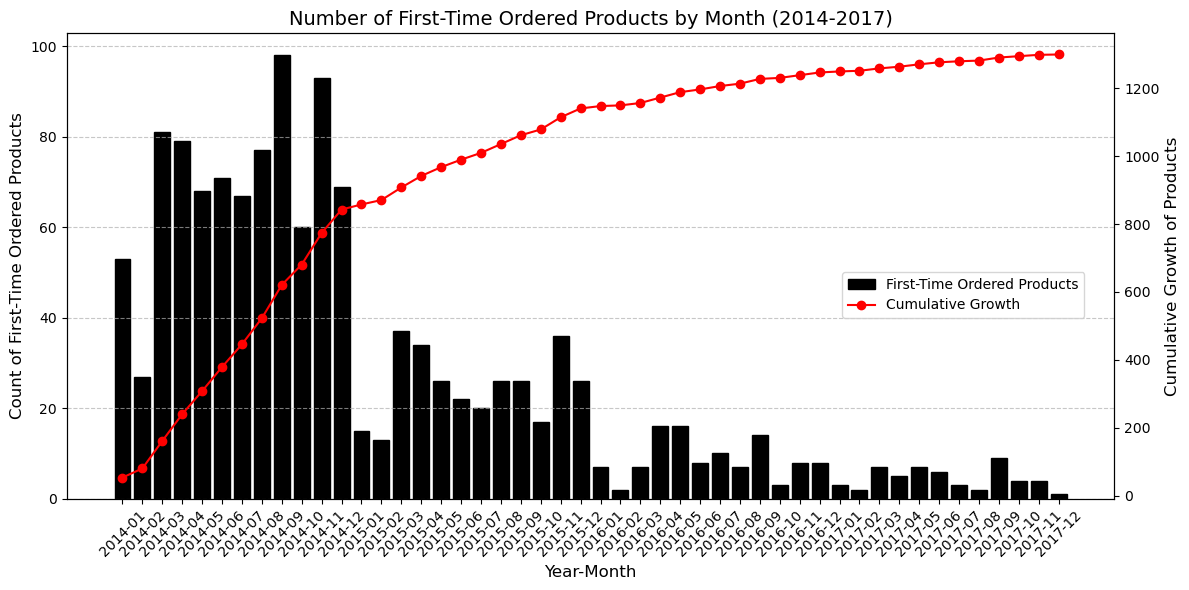

In [36]:
# Use df_product. Count the number of first time ordered products by month from 2014 to 2017
# Create a new column 'first_order_month' to extract the month of the first order date
df_product['first_order_month'] = df_product['product_date_first_sale'].dt.month
# Create a new column 'first_order_year' to extract the year of the first order date
df_product['first_order_year'] = df_product['product_date_first_sale'].dt.year
# Create a new column 'first_order_year_month' to extract the year and month of the first order date
df_product['first_order_year_month'] = df_product['product_date_first_sale'].dt.to_period('M')

# Use the above column and count of respective product_id to generate a histogram profit_table_sorted
# Count the number of first-time ordered products by year and month
first_order_counts = df_product.groupby('first_order_year_month')['product_id'].count()

# Plot the histogram and cumulative growth on the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the histogram (bars)
ax1.bar(first_order_counts.index.astype(str), first_order_counts, color='black', edgecolor='black', label='First-Time Ordered Products')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Count of First-Time Ordered Products', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate cumulative growth of the number of product_id over time
cumulative_growth = first_order_counts.cumsum()

# Print the last value of cumulative_growth
print("Last value of cumulative growth:", cumulative_growth.iloc[-1])

# Plot the cumulative growth (line)
ax2 = ax1.twinx()
ax2.plot(first_order_counts.index.astype(str), cumulative_growth, color='red', linestyle='-', marker='o', label='Cumulative Growth')
ax2.set_ylabel('Cumulative Growth of Products', fontsize=12)

# Add legends for both axes
fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.5), fontsize=10)

# Customize the plot
plt.title('Number of First-Time Ordered Products by Month (2014-2017)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\2460169205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['first_order_month'] = df_product['product_date_first_sale'].dt.month
C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\2460169205.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['first_order_year'] = df_product['product_date_first_sale'].dt.year
C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\2460169205.py:7: SettingWithCopyWarning: 
A value is trying to b

Last value of cumulative growth: 1300


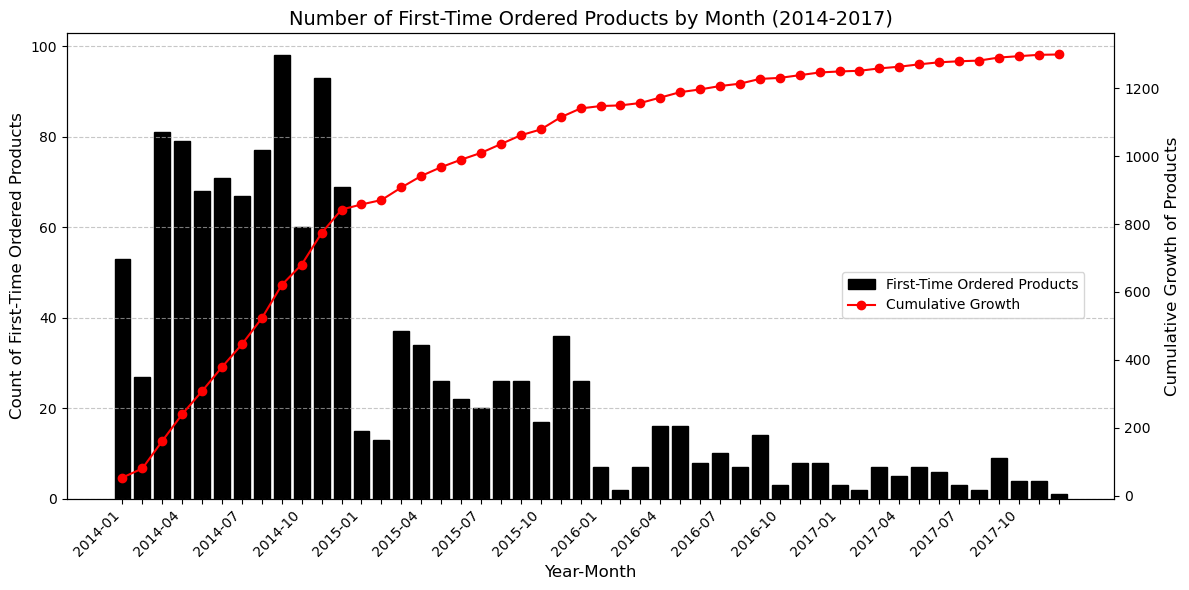

In [37]:
# Use df_product. Count the number of first time ordered products by month from 2014 to 2017
# Create a new column 'first_order_month' to extract the month of the first order date
df_product['first_order_month'] = df_product['product_date_first_sale'].dt.month
# Create a new column 'first_order_year' to extract the year of the first order date
df_product['first_order_year'] = df_product['product_date_first_sale'].dt.year
# Create a new column 'first_order_year_month' to extract the year and month of the first order date
df_product['first_order_year_month'] = df_product['product_date_first_sale'].dt.to_period('M')

# Use the above column and count of respective product_id to generate a histogram profit_table_sorted
# Count the number of first-time ordered products by year and month
first_order_counts = df_product.groupby('first_order_year_month')['product_id'].count()

# Plot the histogram and cumulative growth on the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the histogram (bars)
ax1.bar(first_order_counts.index.astype(str), first_order_counts, color='black', edgecolor='black', label='First-Time Ordered Products')
# Show only every third Year-Month label on the x-axis
xticks = list(range(len(first_order_counts)))
xticklabels = [str(label) if i % 3 == 0 else '' for i, label in enumerate(first_order_counts.index.astype(str))]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels, rotation=45, ha='right', fontsize=10)
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Count of First-Time Ordered Products', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate cumulative growth of the number of product_id over time
cumulative_growth = first_order_counts.cumsum()

# Print the last value of cumulative_growth
print("Last value of cumulative growth:", cumulative_growth.iloc[-1])

# Plot the cumulative growth (line)
ax2 = ax1.twinx()
ax2.plot(first_order_counts.index.astype(str), cumulative_growth, color='red', linestyle='-', marker='o', label='Cumulative Growth')
ax2.set_ylabel('Cumulative Growth of Products', fontsize=12)

# Add legends for both axes
fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.5), fontsize=10)

# Customize the plot
plt.title('Number of First-Time Ordered Products by Month (2014-2017)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Show correlation between Discount and Profit Margin

category
Furniture          17.392268
Office Supplies    15.728510
Technology         13.232269
Name: discount, dtype: float64
category
Furniture           3.878353
Office Supplies    13.803029
Technology         15.613805
Name: profit_margin, dtype: float64


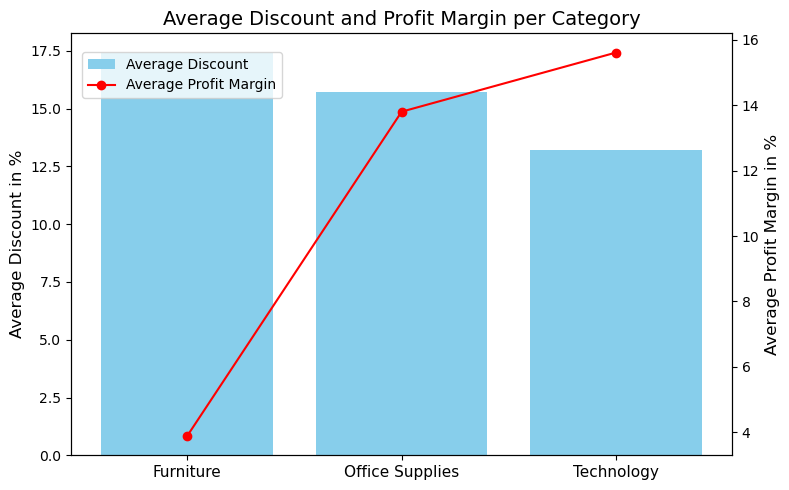

In [38]:
import numpy as np

# Calculate average discount per row_id per category
avg_discount_per_category = df.groupby('category')['discount'].mean() * 100

# Display the result
print(avg_discount_per_category)

# For each line in df divide profit by sales to generate profit margin
df['profit_margin'] = df['profit'] / df['sales']

# Generate average profit margin per category
avg_profit_margin_per_category = df.groupby('category')['profit_margin'].mean() * 100

# Display the result
print(avg_profit_margin_per_category)

# Plot generation, show average discount and profit margin per category in one plot
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for average discount
x = np.arange(len(avg_discount_per_category))
ax1.bar(x, avg_discount_per_category, color='skyblue', label='Average Discount')
ax1.set_ylabel('Average Discount in %', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(avg_discount_per_category.index, rotation=0, ha='center', fontsize=11)

# Line plot for average profit margin
ax2 = ax1.twinx()
ax2.plot(x, avg_profit_margin_per_category, color='red', marker='o', label='Average Profit Margin')
ax2.set_ylabel('Average Profit Margin in %', fontsize=12)

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Add title
plt.title('Average Discount and Profit Margin per Category', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


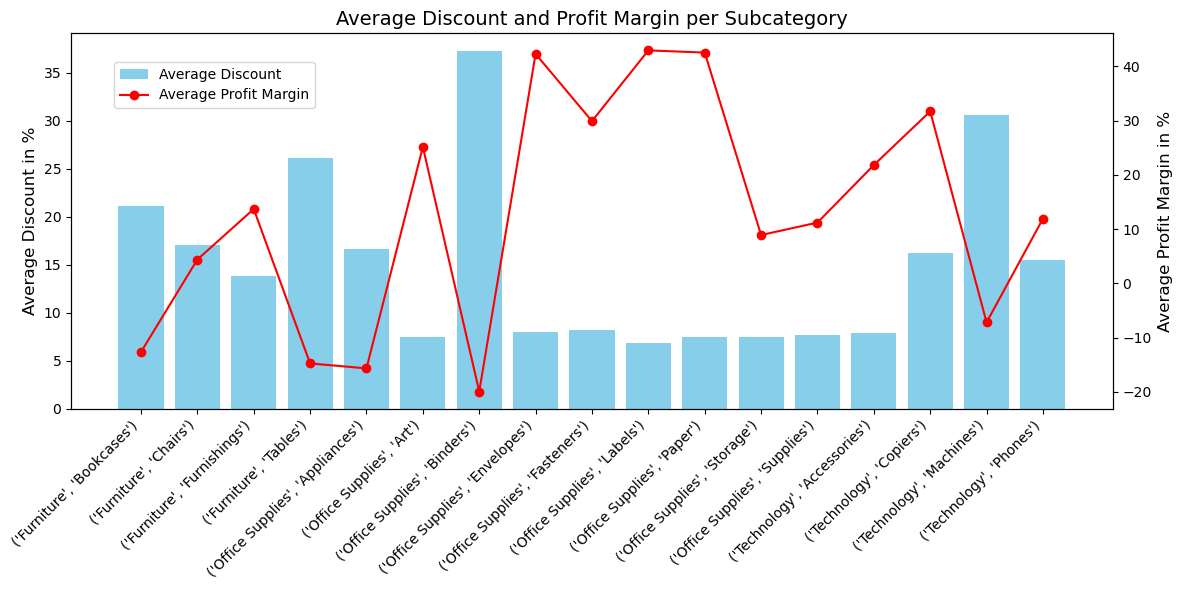

In [39]:
import numpy as np

# Calculate average discount per row_id per subcategory
avg_discount_per_subcategory = df.groupby(['category', 'subcategory'])['discount'].mean() * 100

# Display the result
avg_discount_per_subcategory


# for each line in df divide profit by sales to generate profit margin
df['profit_margin'] = df['profit'] / df['sales']

# Generate average profit margin per subcategory
avg_profit_margin_per_subcategory = df.groupby(['category', 'subcategory'])['profit_margin'].mean() * 100

# Display the result
avg_profit_margin_per_subcategory


# Plot generation, show average discount and profit margin per subcategory in one plot
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average discount
x = np.arange(len(avg_discount_per_subcategory))
ax1.bar(x, avg_discount_per_subcategory, color='skyblue', label='Average Discount')
ax1.set_ylabel('Average Discount in %', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(avg_discount_per_subcategory.index, rotation=45, ha='right', fontsize=10)

# Line plot for average profit margin
ax2 = ax1.twinx()
ax2.plot(x, avg_profit_margin_per_subcategory, color='red', marker='o', label='Average Profit Margin')
ax2.set_ylabel('Average Profit Margin in %', fontsize=12)

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Add title
plt.title('Average Discount and Profit Margin per Subcategory', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

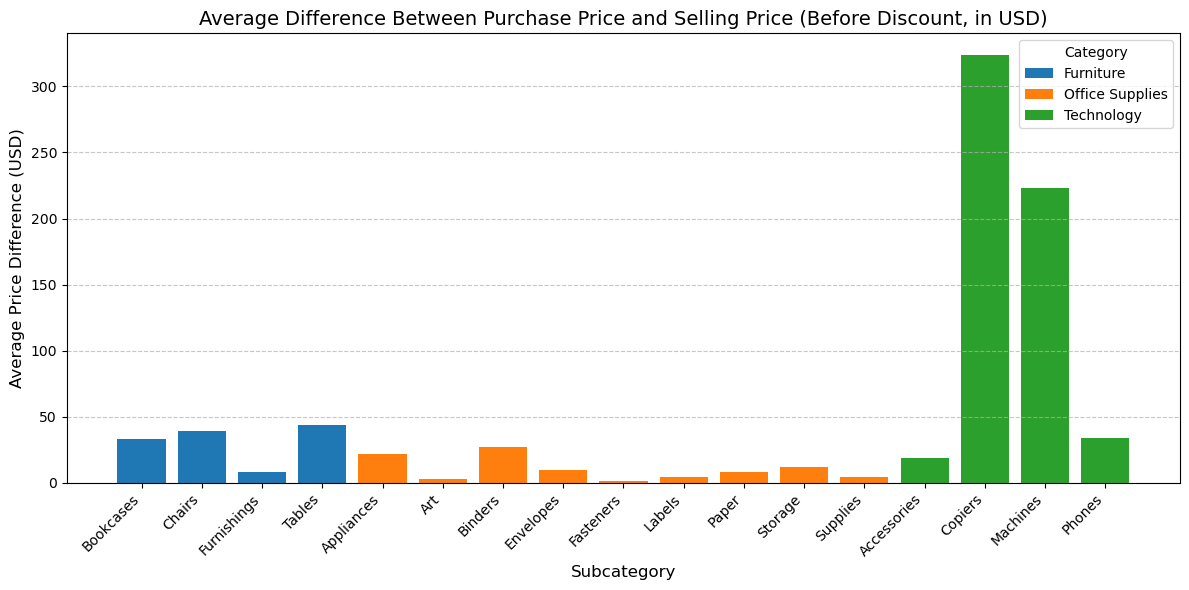

In [40]:
# Use df_product as dataframe
# Calculate average difference between purchase price and selling price before discount
# group by category and subcategory and show as plot

import matplotlib.pyplot as plt

# Calculate the average difference between purchase price and selling price before discount
df['price_difference'] = df['selling_price'] - df['purchase_price']
avg_price_diff = df.groupby(['category', 'subcategory'])['price_difference'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
for category in avg_price_diff['category'].unique():
    subset = avg_price_diff[avg_price_diff['category'] == category]
    plt.bar(subset['subcategory'], subset['price_difference'], label=category)

# Customize the plot
plt.title('Average Difference Between Purchase Price and Selling Price (Before Discount, in USD)', fontsize=14)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Average Price Difference (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


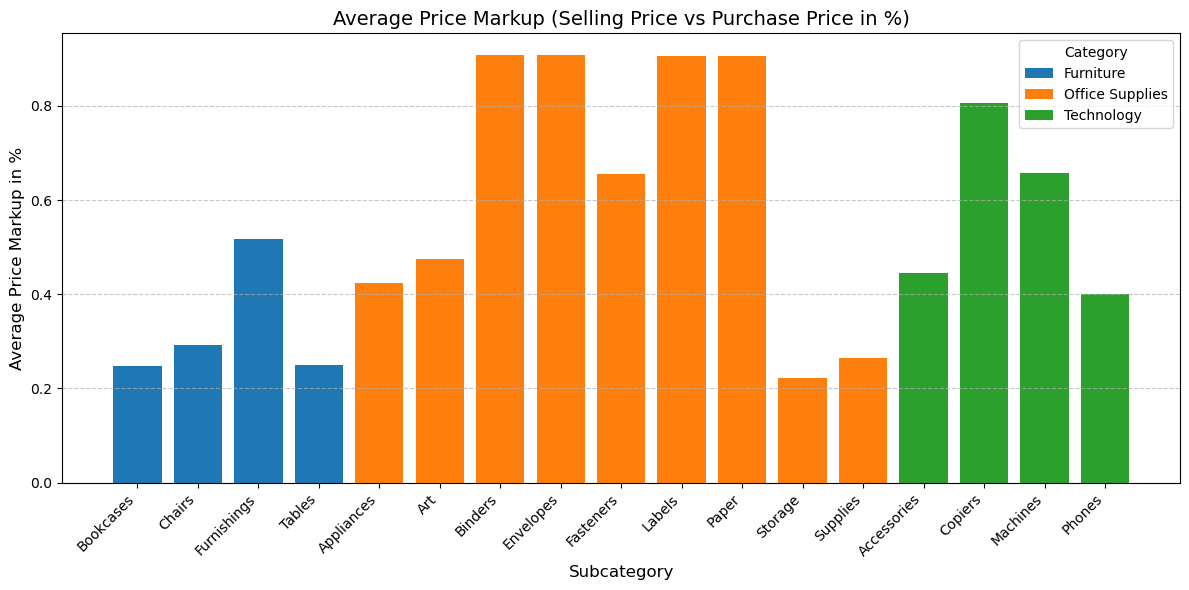

In [41]:
import matplotlib.pyplot as plt

# Calculate the price markup as (selling_price / purchase_price) - 1
df['price_markup'] = (df['selling_price'] / df['purchase_price']) - 1
avg_price_markup = df.groupby(['category', 'subcategory'])['price_markup'].mean().reset_index()


# technically I would have to integrate a weighing factor that takes into account quanity sold


# Plot the results
plt.figure(figsize=(12, 6))
for category in avg_price_markup['category'].unique():
    subset = avg_price_markup[avg_price_markup['category'] == category]
    plt.bar(subset['subcategory'], subset['price_markup'], label=category)

# Customize the plot
plt.title('Average Price Markup (Selling Price vs Purchase Price in %)', fontsize=14)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Average Price Markup in %', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Transactions per Month

In [42]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,total_profit,avg_profit_per_order,sub_category_count,total_sales,buy_sell_ratio,avg_orders_per_month,avg_discount_per_order,first_order_month,first_order_year,first_order_year_month
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,...,24.1960,8.065333,50,1064.624,1.162791,0.079787,0.100000,11,2014,2014-11
5,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2015-04-16,2017-12-09,968,968,21,22,...,147.0942,29.418840,50,1119.195,1.315789,0.151668,0.170000,4,2015,2015-04
8,FUR-BO-10001619,O'Sullivan Cherrywood Estates Traditional Book...,Furniture,Bookcases,2016-11-24,2017-01-21,58,58,343,6,...,27.1936,13.596800,50,424.900,1.282051,0.149626,0.100000,11,2016,2016-11
10,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,2015-03-01,2017-09-23,937,937,98,26,...,15.0490,1.881125,50,5492.885,1.428571,0.231884,0.316250,3,2015,2015-03
15,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,2014-09-20,2017-06-25,1009,1009,188,27,...,90.1764,15.029400,50,11046.609,1.234568,0.150376,0.183333,9,2014,2014-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,TEC-PH-10004896,Nokia Lumia 521 (T-Mobile),Technology,Phones,2014-11-19,2017-03-26,858,858,279,20,...,83.9720,16.794400,189,515.828,1.388889,0.131926,0.160000,11,2014,2014-11
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,...,178.4790,25.497000,189,1665.804,1.428571,0.191781,0.228571,12,2014,2014-12
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,...,87.3705,29.123500,189,516.530,1.408451,0.070978,0.133333,7,2014,2014-07
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,...,130.6305,26.126100,189,1085.238,1.333333,0.110051,0.120000,4,2014,2014-04


Product Life Cycle (PLC) Categorization

PLC Version 1

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\3525049420.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['PLC_Category'] = df_product.apply(assign_plc_category, axis=1, today=today, df=df)


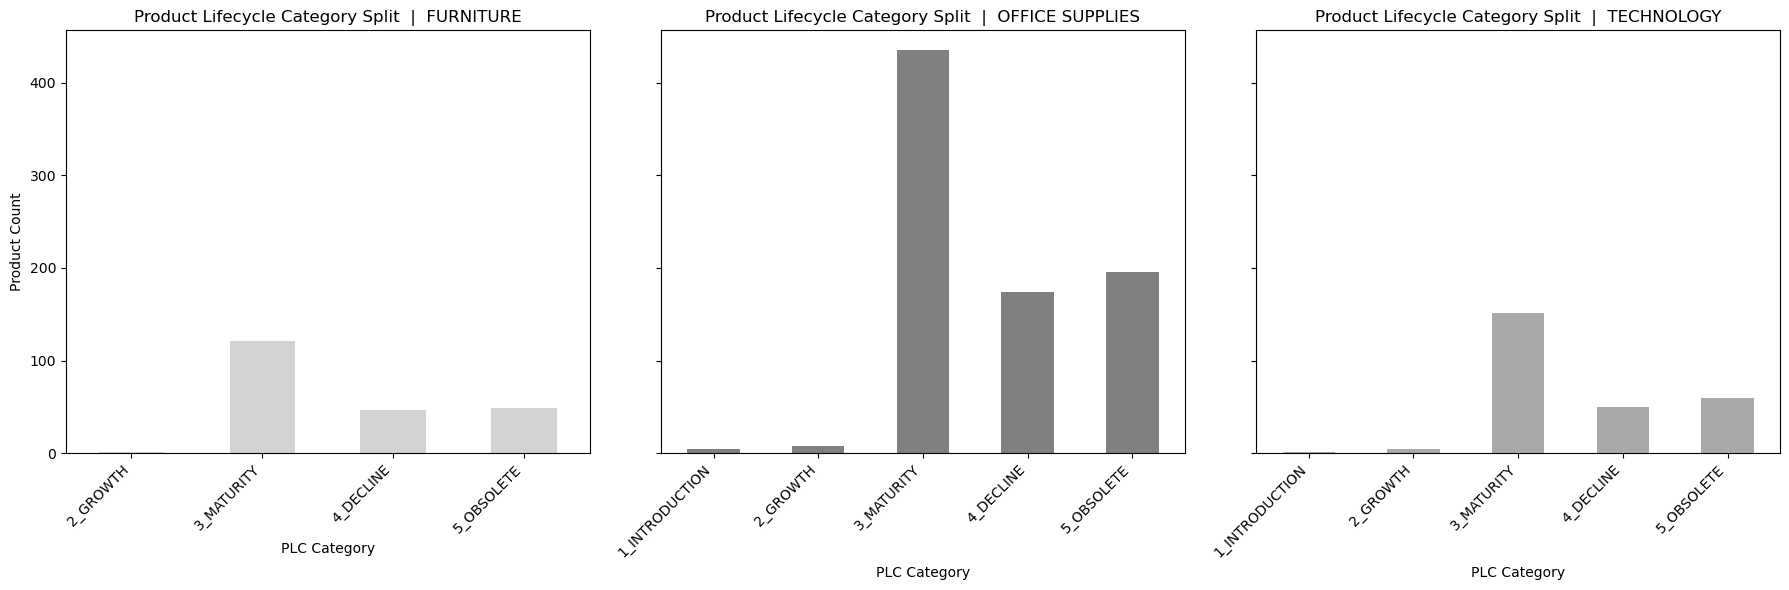

In [43]:
# Creation of Product Lifecycle (PLC) Category

def assign_plc_category(row, today, df):
    # Calculate the difference in days
    days_since_first_sale = (today - row['product_date_first_sale']).days
    days_since_last_sale = (today - row['product_date_last_sale']).days

    # First category: 'INTRODUCTION'
    if days_since_first_sale <= 60:
        return '1_INTRODUCTION'

    # Second category: 'GROWTH'
    if 60 < days_since_first_sale <= 120:
        return '2_GROWTH'

    # Last category: 'OBSOLETE'
    if days_since_last_sale > 150:
        return '5_OBSOLETE'
    
    # Third and Fourth Category: 'MATURITY' and 'DECLINE'
    if days_since_first_sale > 120:
        # Calculate the middle date
        total_days = (row['product_date_last_sale'] - row['product_date_first_sale']).days
        middle_date = row['product_date_first_sale'] + pd.Timedelta(days=total_days // 2)

        # Count unique order_id for period1 (First order date to middle date, inclusive)
        period1_count = df[(df['product_id'] == row['product_id']) & 
                           (df['order_date'] >= row['product_date_first_sale']) & 
                           (df['order_date'] <= middle_date)]['order_id'].nunique()

        # Count unique order_id for period2 (After middle date to last order date, inclusive)
        period2_count = df[(df['product_id'] == row['product_id']) & 
                           (df['order_date'] > middle_date) & 
                           (df['order_date'] <= row['product_date_last_sale'])]['order_id'].nunique()

        # Assign category based on comparison
        if period1_count > period2_count:
            return '4_DECLINE'
        else:
            return '3_MATURITY'
   
    # Default to 'DECLINE' if no other condition is met
    return '4_DECLINE'



# Apply the function to assign PLC_Category
df_product['PLC_Category'] = df_product.apply(assign_plc_category, axis=1, today=today, df=df)



# Plot generation
import matplotlib.pyplot as plt

# Prepare data for each category
categories = ['Furniture', 'Office Supplies', 'Technology']
colors = ['lightgrey', 'grey', 'darkgrey']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (category, color) in enumerate(zip(categories, colors)):
    df_cat = df_product[df_product['category'] == category]
    ax = axes[i]
    if df_cat.empty:
        ax.set_title(f'Product Lifecycle Category Split  |  {category.upper()}')
        ax.set_xlabel('PLC Category')
        if i == 0:
            ax.set_ylabel('Product Count')
        else:
            ax.set_ylabel('')
        ax.text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12, color='red', transform=ax.transAxes)
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    plc_counts = df_cat['PLC_Category'].value_counts().sort_index()
    plc_counts.plot(
        kind='bar',
        color=color,
        ax=ax,
        title=f'Product Lifecycle Category Split  |  {category.upper()}'
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel('PLC Category')
    if i == 0:
        ax.set_ylabel('Product Count')
    else:
        ax.set_ylabel('')

plt.tight_layout()
plt.show()


# Validation in Excel
# Method above correctly assigned PLC_Category

In [44]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,avg_profit_per_order,sub_category_count,total_sales,buy_sell_ratio,avg_orders_per_month,avg_discount_per_order,first_order_month,first_order_year,first_order_year_month,PLC_Category
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,...,8.065333,50,1064.624,1.162791,0.079787,0.100000,11,2014,2014-11,5_OBSOLETE
5,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2015-04-16,2017-12-09,968,968,21,22,...,29.418840,50,1119.195,1.315789,0.151668,0.170000,4,2015,2015-04,3_MATURITY
8,FUR-BO-10001619,O'Sullivan Cherrywood Estates Traditional Book...,Furniture,Bookcases,2016-11-24,2017-01-21,58,58,343,6,...,13.596800,50,424.900,1.282051,0.149626,0.100000,11,2016,2016-11,5_OBSOLETE
10,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,2015-03-01,2017-09-23,937,937,98,26,...,1.881125,50,5492.885,1.428571,0.231884,0.316250,3,2015,2015-03,3_MATURITY
15,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,2014-09-20,2017-06-25,1009,1009,188,27,...,15.029400,50,11046.609,1.234568,0.150376,0.183333,9,2014,2014-09,5_OBSOLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,TEC-PH-10004896,Nokia Lumia 521 (T-Mobile),Technology,Phones,2014-11-19,2017-03-26,858,858,279,20,...,16.794400,189,515.828,1.388889,0.131926,0.160000,11,2014,2014-11,5_OBSOLETE
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,...,25.497000,189,1665.804,1.428571,0.191781,0.228571,12,2014,2014-12,4_DECLINE
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,...,29.123500,189,516.530,1.408451,0.070978,0.133333,7,2014,2014-07,3_MATURITY
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,...,26.126100,189,1085.238,1.333333,0.110051,0.120000,4,2014,2014-04,5_OBSOLETE


PLC Version 2

In [45]:
# # Creation of Product Life Cycle (PLC) Category

# def assign_plc_category(row, today, df):
#     # Calculate the difference in days
#     days_since_first_sale = (today - row['product_date_first_sale']).days
#     days_since_last_sale = (today - row['product_date_last_sale']).days

#     # First category: 'INTRODUCTION'
#     if days_since_first_sale <= 60:
#         return '1_INTRODUCTION'

#     # Second category: 'GROWTH'
#     if 60 < days_since_first_sale <= 120:
#         return '2_GROWTH'

#     # Third and Fourth Category: 'MATURITY' and 'DECLINE'
#     if days_since_first_sale > 120:
#         if days_since_last_sale <= 120:
#             # Calculate counts for Period 1 and Period 2
#             period_1_start = row['product_date_last_sale'] - pd.Timedelta(days=120)
#             period_2_start = row['product_date_last_sale'] - pd.Timedelta(days=240)
            
#             period_1_count = df[(df['product_id'] == row['product_id']) & 
#                                 (df['order_date'] > period_1_start) & 
#                                 (df['order_date'] <= row['product_date_last_sale'])].shape[0]
#             period_2_count = df[(df['product_id'] == row['product_id']) & 
#                                 (df['order_date'] > period_2_start) & 
#                                 (df['order_date'] <= period_1_start)].shape[0] or 0
#             # Check the ratio
#             if period_2_count > 0 and (period_1_count / period_2_count) < 0.666667:
#                 return '4_DECLINE'
#             else:
#                 return '3_MATURITY'

#     # Last category: 'OBSOLETE'
#     if days_since_last_sale > 150:
#         return '5_OBSOLETE'

#     # Default to 'DECLINE' if no other condition is met
#     return '4_DECLINE'



# # Apply the function to assign PLC_Category
# df_product['PLC_Category'] = df_product.apply(assign_plc_category, axis=1, today=today, df=df)

# # Limit output in df_product to technology products
# df_product_technology = df_product[df_product['category'] == 'Technology']


# # Print summary of PLC_Category
# print(df_product_technology['PLC_Category'].value_counts().sort_index())


# # Create bar chart for PLC_Category
# df_product_technology['PLC_Category'].value_counts().sort_index().plot(kind='bar', title='Product Life Cycle Category Distribution')

Additional Options to illustrate different PLC compositions per category:

--> Show for each of the three main categories as stacked bars
 
--> e.g. : 1_Introduction x %, 2_Growth y %, etc. 

In [46]:
# df_product_technology

In [47]:
# Calculate the average profit contribution per product_id in the following way:
# first calculate per subcategory the average profit contribution = take sum of all 'total_profit' values for all product_id in same subcategory, then divide by count of product_id in same subcategory. The result has be divided by 48 (equaling 4 years) to get the average profit contribution per month.
# the calculate average profit contribution per product_id ('avg_mth_profit_contribution') by dividing the 'total_profit' of each product_id by ('product_selling_days_f2l' / 30, exception if 'count_orders' = 1, then use 'days_since_last_sale' / 30 instead) average profit contribution per subcategory by the number of product_id in the same subcategory.
# insert 'avg_mth_profit_contribution' as new column in df_product

# then calculate how the 'avg_mth_profit_contribution' of each product_id compares to the average profit contribution per subcategory. 
# If the 'avg_mth_profit_contribution' is more than 15% above the average profit contribution per subcategory, then assign 'High', 
# if it is >= +15% and >= -15% then assign 'Avg'
# if is below -15%, then assign 'Low'. 
# write the category in a new column 'avg_mth_profit_contribution_category' in df_product



# Calculate average profit contribution per subcategory
subcategory_avg_profit_contribution = (
    df_product.groupby('subcategory')['total_profit'].sum() /
    df_product.groupby('subcategory')['product_id'].count()
) / 48

# Map the average profit contribution per subcategory to each product_id
df_product['subcategory_avg_profit_contribution'] = df_product['subcategory'].map(subcategory_avg_profit_contribution)

# Calculate average monthly profit contribution per product_id
df_product['avg_mth_profit_contribution'] = df_product.apply(
    lambda row: row['total_profit'] / (row['product_selling_days_f2l'] / 30)
    if row['count_orders'] > 1
    else row['total_profit'] / (row['days_since_last_sale'] / 30),
    axis=1
)

# Compare avg_mth_profit_contribution to subcategory average and assign category
def categorize_profit_contribution(row):
    subcategory_avg = row['subcategory_avg_profit_contribution']
    contribution = row['avg_mth_profit_contribution']
    if contribution > subcategory_avg * 1.5:
        return '3_High'
    elif subcategory_avg * 0.5 <= contribution <= subcategory_avg * 1.5:
        return '2_Medium'
    else:
        return '1_Low'

df_product['avg_mth_profit_contribution_category'] = df_product.apply(categorize_profit_contribution, axis=1)

# Drop the temporary column used for mapping
df_product.drop(columns=['subcategory_avg_profit_contribution'], inplace=True)


C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\293331884.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['subcategory_avg_profit_contribution'] = df_product['subcategory'].map(subcategory_avg_profit_contribution)
C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\293331884.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['avg_mth_profit_contribution'] = df_product.apply(
C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_10852\293331884.py:42: SettingWithCopyWarning: 
A

In [48]:
print(subcategory_avg_profit_contribution)

subcategory
Accessories     7.164025
Appliances      4.987293
Art             0.879880
Binders         4.833476
Bookcases       3.881892
Chairs         10.914084
Copiers        92.716736
Envelopes       2.644060
Fasteners       0.620365
Furnishings     2.134560
Labels          1.753009
Machines       12.922753
Paper           2.850658
Phones          6.401569
Storage         6.027541
Supplies        0.850751
Tables          5.320708
dtype: float64


In [49]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,total_sales,buy_sell_ratio,avg_orders_per_month,avg_discount_per_order,first_order_month,first_order_year,first_order_year_month,PLC_Category,avg_mth_profit_contribution,avg_mth_profit_contribution_category
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,...,1064.624,1.162791,0.079787,0.100000,11,2014,2014-11,5_OBSOLETE,0.794179,1_Low
5,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2015-04-16,2017-12-09,968,968,21,22,...,1119.195,1.315789,0.151668,0.170000,4,2015,2015-04,3_MATURITY,4.558705,2_Medium
8,FUR-BO-10001619,O'Sullivan Cherrywood Estates Traditional Book...,Furniture,Bookcases,2016-11-24,2017-01-21,58,58,343,6,...,424.900,1.282051,0.149626,0.100000,11,2016,2016-11,5_OBSOLETE,14.065655,3_High
10,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,2015-03-01,2017-09-23,937,937,98,26,...,5492.885,1.428571,0.231884,0.316250,3,2015,2015-03,3_MATURITY,0.481825,1_Low
15,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,2014-09-20,2017-06-25,1009,1009,188,27,...,11046.609,1.234568,0.150376,0.183333,9,2014,2014-09,5_OBSOLETE,2.681162,2_Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,TEC-PH-10004896,Nokia Lumia 521 (T-Mobile),Technology,Phones,2014-11-19,2017-03-26,858,858,279,20,...,515.828,1.388889,0.131926,0.160000,11,2014,2014-11,5_OBSOLETE,2.936084,1_Low
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,...,1665.804,1.428571,0.191781,0.228571,12,2014,2014-12,4_DECLINE,5.114011,2_Medium
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,...,516.530,1.408451,0.070978,0.133333,7,2014,2014-07,3_MATURITY,2.115508,1_Low
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,...,1085.238,1.333333,0.110051,0.120000,4,2014,2014-04,5_OBSOLETE,3.845844,2_Medium


## Export for CLustering

In [50]:
# Export df_product to csv file
df_product.to_csv('Archive/df_product_active2.csv', index=False)

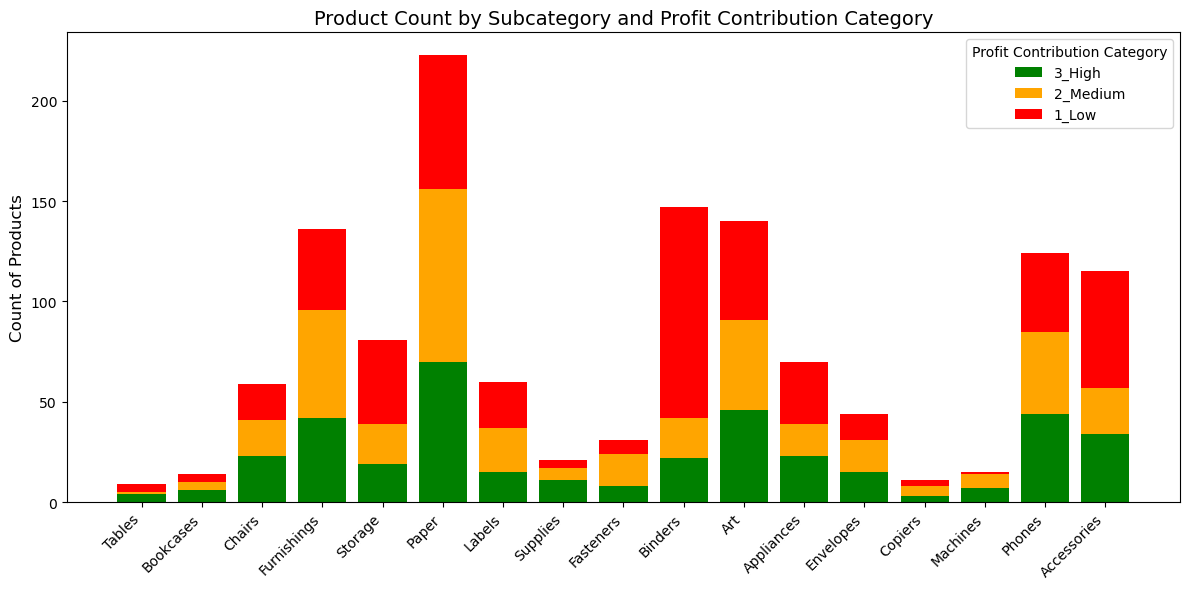

In [51]:
import numpy as np

# Create a plot which shows stacked bars for each subcategory in the following order: Furniture, Office Supplies, Technology
# the bars should show the count of product_id in each subcategory with avg_mth_profit_contribution_category '3_High', '2_Medium' and '1_Low'

import matplotlib.pyplot as plt

# Define the subcategory order
subcategory_order = df_product.groupby('subcategory')['category'].first().sort_values()

# Prepare data for the plot
subcategory_counts = df_product.groupby(['subcategory', 'avg_mth_profit_contribution_category'])['product_id'].count().unstack(fill_value=0)
subcategory_counts = subcategory_counts.reindex(subcategory_order.index)

# Define colors for the categories
category_colors = {
    '3_High': 'green',
    '2_Medium': 'orange',
    '1_Low': 'red'
}

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(subcategory_counts))

# Plot stacked bars
bottom = np.zeros(len(subcategory_counts))
for category in ['3_High', '2_Medium', '1_Low']:
    ax.bar(x, subcategory_counts[category], label=category, color=category_colors[category], bottom=bottom)
    bottom += subcategory_counts[category]

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(subcategory_counts.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Count of Products', fontsize=12)
ax.set_title('Product Count by Subcategory and Profit Contribution Category', fontsize=14)
ax.legend(title='Profit Contribution Category', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

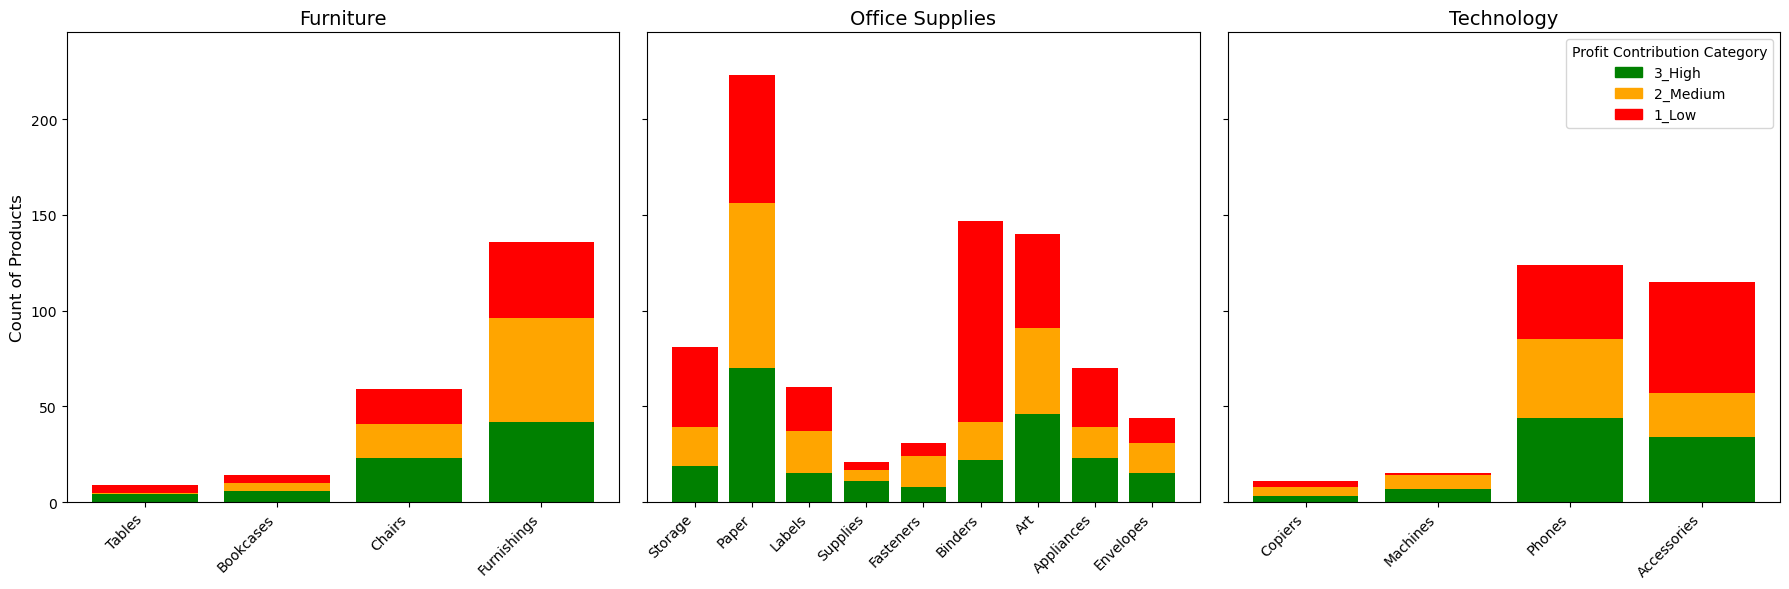

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique categories in alphabetical order
categories = sorted(df_product['category'].unique())

# Prepare subcategory order and colors as before
subcategory_order = df_product.groupby('subcategory')['category'].first().sort_values()
subcategory_counts = df_product.groupby(['subcategory', 'avg_mth_profit_contribution_category'])['product_id'].count().unstack(fill_value=0)
subcategory_counts = subcategory_counts.reindex(subcategory_order.index)
subcategory_colors = [ 
    {'Furniture': 'lightblue', 'Office Supplies': 'orange', 'Technology': 'green'}[cat] 
    for cat in subcategory_order.values
]
category_colors = {
    '3_High': 'green',
    '2_Medium': 'orange',
    '1_Low': 'red'
}

# Find global max for y-axis
ymax = subcategory_counts.sum(axis=1).max() * 1.1

# Create three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, category in enumerate(categories):
    # Filter subcategories for this category
    subcats = subcategory_order[subcategory_order == category].index
    counts = subcategory_counts.loc[subcats]
    x = np.arange(len(counts))
    bottom = np.zeros(len(counts))
    for cat in ['3_High', '2_Medium', '1_Low']:
        axes[i].bar(x, counts[cat], label=cat if i == 0 else "", color=category_colors[cat], bottom=bottom)
        bottom += counts[cat]
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right', fontsize=10)
    axes[i].set_title(category, fontsize=14)
    axes[i].set_ylim(0, ymax)
    if i == 0:
        axes[i].set_ylabel('Count of Products', fontsize=12)
    else:
        axes[i].set_ylabel('')
    if i == 2:
        axes[i].legend(
            handles=[
                plt.matplotlib.patches.Patch(color=category_colors['3_High'], label='3_High'),
                plt.matplotlib.patches.Patch(color=category_colors['2_Medium'], label='2_Medium'),
                plt.matplotlib.patches.Patch(color=category_colors['1_Low'], label='1_Low')
            ],
            title='Profit Contribution Category',
            fontsize=10,
            loc='upper right'
        )

plt.tight_layout()
plt.show()

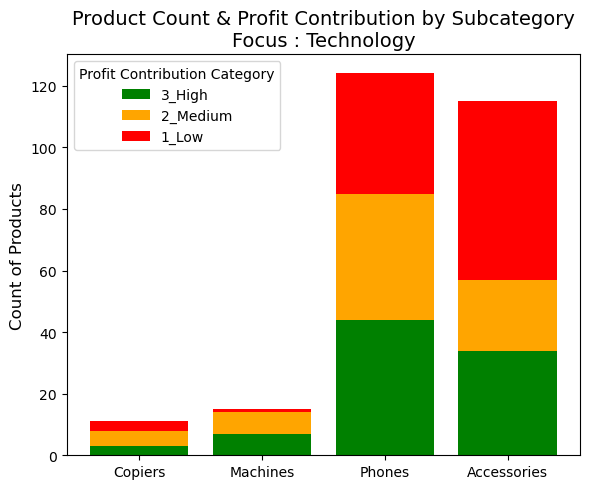

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Filter df_product for Technology subcategories only
tech_subcategories = df_product[df_product['category'] == 'Technology']['subcategory'].unique()
subcategory_order_tech = subcategory_order[subcategory_order.index.isin(tech_subcategories)]

# Prepare data for the plot (Technology only)
subcategory_counts_tech = df_product[df_product['category'] == 'Technology'] \
    .groupby(['subcategory', 'avg_mth_profit_contribution_category'])['product_id'] \
    .count().unstack(fill_value=0)
subcategory_counts_tech = subcategory_counts_tech.reindex(subcategory_order_tech.index)

# Define colors for the categories
category_colors = {
    '3_High': 'green',
    '2_Medium': 'orange',
    '1_Low': 'red'
}

# Create the plot
fig, ax = plt.subplots(figsize=(6, 5))
x = np.arange(len(subcategory_counts_tech))

# Plot stacked bars
bottom = np.zeros(len(subcategory_counts_tech))
for category in ['3_High', '2_Medium', '1_Low']:
    ax.bar(x, subcategory_counts_tech.get(category, 0), label=category, color=category_colors[category], bottom=bottom)
    bottom += subcategory_counts_tech.get(category, 0)

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(subcategory_counts_tech.index, rotation=0, ha='center', fontsize=10)
ax.set_ylabel('Count of Products', fontsize=12)
ax.set_title('Product Count & Profit Contribution by Subcategory\nFocus : Technology', fontsize=14)
ax.legend(title='Profit Contribution Category', fontsize=10)

plt.tight_layout()
plt.show()


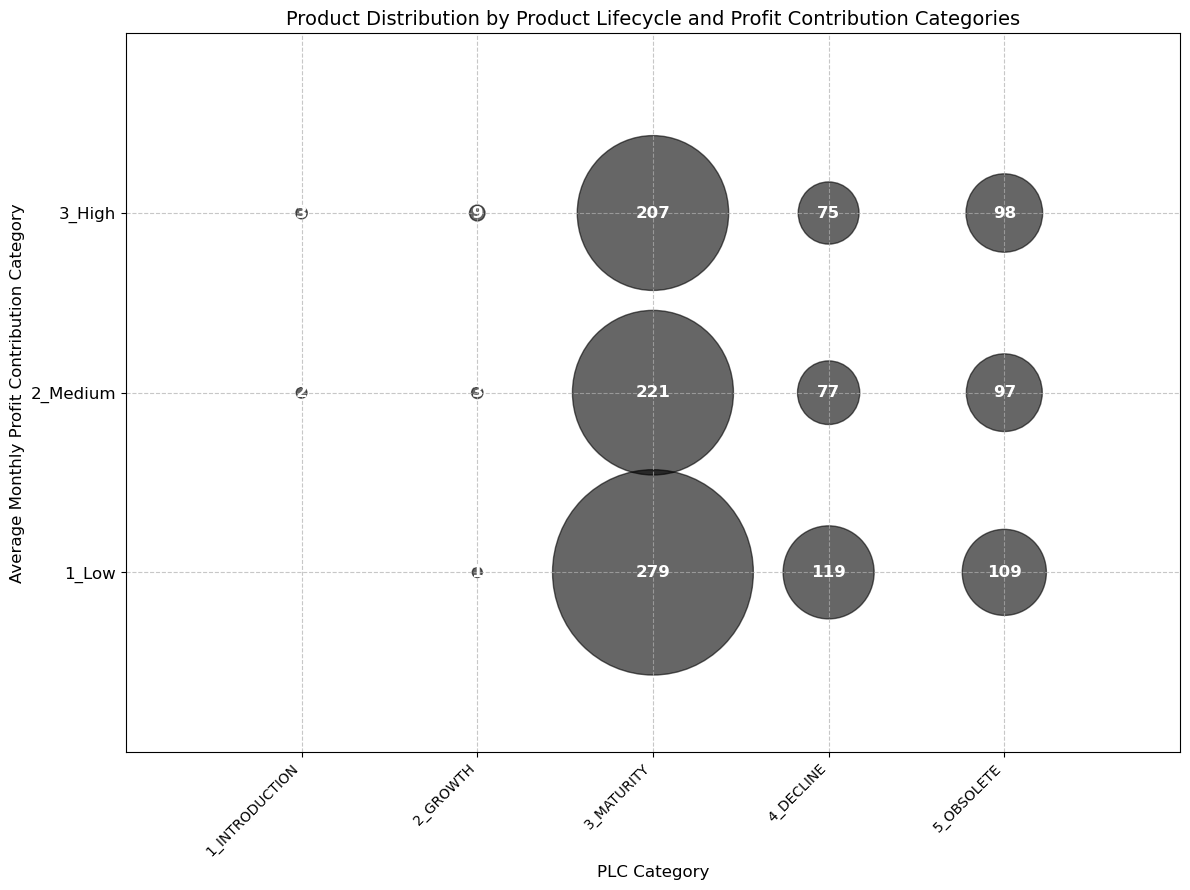

In [54]:
import numpy as np

# Create a 5 x 3 grid of subplots
# x-axis: avg_mth_profit_contribution_category
# y-axis: PLC_Category
# hue: category
# inside each subplot area there should be three circles which show the count of product_id in each category
# size of the circles should be proportional to the count of product_id in each category
# use df_product as dataframe
# there is a maximum of three circles in each subplot (one for each 'category')
# the circles should be colored according to the category
# the circles should not overlap each other

import matplotlib.pyplot as plt

# # Limit the dataframe to only Technology category
# df_product = df_product[df_product['category'] == 'Technology']

# Define unique values for x-axis and y-axis
x_categories = sorted(df_product['PLC_Category'].unique())
y_categories = sorted(df_product['avg_mth_profit_contribution_category'].unique())

# Create a mapping for x and y positions with extra space for the last category
x_positions = {cat: i + 0.5 for i, cat in enumerate(x_categories)}
x_positions[''] = len(x_categories) + 0.5  # Add extra space after the last category
y_positions = {cat: i + 0.5 for i, cat in enumerate(y_categories)}
y_positions[''] = len(y_categories) + 0.5  # Add extra space after the last category

# Calculate the min and max counts for scaling the circle radius
min_count = df_product.groupby(['PLC_Category', 'avg_mth_profit_contribution_category']).size().min()
max_count = df_product.groupby(['PLC_Category', 'avg_mth_profit_contribution_category']).size().max()
min_radius = 1
max_radius = 20

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

# Loop through each combination of x and y categories
for x_cat in x_categories:
    for y_cat in y_categories:
        # Filter data for the current x and y category
        subset = df_product[
            (df_product['PLC_Category'] == x_cat) &
            (df_product['avg_mth_profit_contribution_category'] == y_cat)
        ]
        
        # Count the total number of products
        total_count = len(subset)
        
        # Plot a circle proportional to the total count
        if total_count > 0:
            radius = min_radius + (total_count - min_count) / (max_count - min_count) * (max_radius - min_radius)
            circle = plt.Circle(
                (x_positions[x_cat], y_positions[y_cat]),  # Center position
                radius=radius / 35,  # Scale radius
                color='black',
                alpha=0.6
            )
            ax.add_artist(circle)
            ax.text(
                x_positions[x_cat],
                y_positions[y_cat],
                str(total_count),
                color='white',
                ha='center',
                va='center',
                fontsize=12,
                fontweight='bold'
            )

# Set x-axis and y-axis labels
# Add extra space at the end of each axis by extending the limits
ax.set_xlim(-0.5, len(x_categories) + 0.5)  # Extend x-axis limits
ax.set_ylim(-0.5, len(y_categories) + 0.5)  # Extend y-axis limits

# Set ticks and labels for x-axis and y-axis
ax.set_xticks(list(x_positions.values())[:-1])  # Exclude the extra space from ticks
ax.set_xticklabels(list(x_positions.keys())[:-1], rotation=45, ha='right', fontsize=10)  # Exclude the extra space from labels
ax.set_yticks(list(y_positions.values())[:-1])  # Exclude the extra space from ticks
ax.set_yticklabels(list(y_positions.keys())[:-1], fontsize=12)  # Exclude the extra space from labels

# Add grid lines for better visualization
ax.grid(True, linestyle='--', alpha=0.7)

# Set axis labels and title
ax.set_xlabel('PLC Category', fontsize=12)
ax.set_ylabel('Average Monthly Profit Contribution Category', fontsize=12)
ax.set_title('Product Distribution by Product Lifecycle and Profit Contribution Categories', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [55]:
# export into csv file
os.makedirs('Archive', exist_ok=True)
df_product.to_csv('Archive/product_aggregation.csv', index=False, encoding='utf-8')


In [56]:
df_product.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 1 to 1546
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   product_id                            1300 non-null   object        
 1   product_name                          1300 non-null   object        
 2   category                              1300 non-null   object        
 3   subcategory                           1300 non-null   object        
 4   product_date_first_sale               1300 non-null   datetime64[ns]
 5   product_date_last_sale                1300 non-null   datetime64[ns]
 6   product_selling_days_f2l              1300 non-null   int64         
 7   product_selling_days_f2l_l            1300 non-null   int64         
 8   days_since_last_sale                  1300 non-null   int64         
 9   total_quantity                        1300 non-null   int64         
 10  count

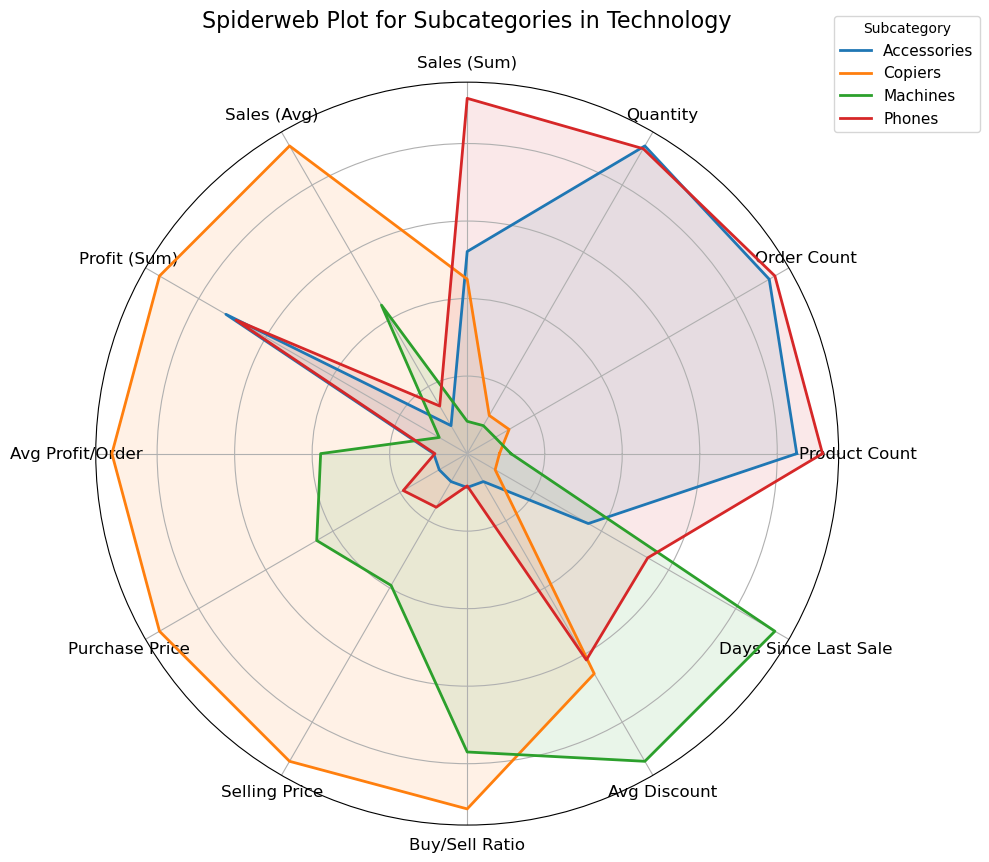

In [57]:
import numpy as np

# Spider's web plot

import matplotlib.pyplot as plt

# Map purchase_price and selling_price from df to df_product by product_id
# For each product_id in df_product, get the first purchase_price and selling_price from df
price_lookup = df.drop_duplicates('product_id')[['product_id', 'purchase_price', 'selling_price']]
df_product = df_product.merge(price_lookup, on='product_id', how='left')



# Select category
selected_category = 'Technology'
df_tech = df_product[df_product['category'] == selected_category]

# Aggregate data by subcategory
agg = df_tech.groupby('subcategory').agg(
    Product_Count=('product_id', 'nunique'),
    count_orders=('count_orders', 'sum'),
    total_quantity=('total_quantity', 'sum'),
    total_sales_sum=('total_sales', 'sum'),
    total_sales_avg=('total_sales', lambda x: x.sum() / df_tech.loc[x.index, 'total_quantity'].sum() if df_tech.loc[x.index, 'total_quantity'].sum() > 0 else 0),
    total_profit=('total_profit', 'sum'),
    avg_profit_per_order=('avg_profit_per_order', 'mean'),
    purchase_price=('purchase_price', 'mean'),
    selling_price=('selling_price', 'mean'),
    buy_sell_ratio=('buy_sell_ratio', 'mean'),
    avg_discount_per_order=('avg_discount_per_order', 'mean'),
    days_since_last_sale=('days_since_last_sale', 'mean')
).reset_index()

# Order columns as specified
columns_order = [
    'Product_Count',
    'count_orders',
    'total_quantity',
    'total_sales_sum',
    'total_sales_avg',
    'total_profit',
    'avg_profit_per_order',
    'purchase_price',
    'selling_price',
    'buy_sell_ratio',
    'avg_discount_per_order',
    'days_since_last_sale'
]

# Prepare data for radar plot
labels = [
    'Product Count', 'Order Count', 'Quantity', 'Sales (Sum)', 'Sales (Avg)',
    'Profit (Sum)', 'Avg Profit/Order', 'Purchase Price', 'Selling Price',
    'Buy/Sell Ratio', 'Avg Discount', 'Days Since Last Sale'
]
num_vars = len(labels)

# Normalize each axis individually for better comparison
def normalize(series):
    min_val = series.min()
    max_val = series.max()
    # Start axis a bit below min and end a bit above max
    pad = (max_val - min_val) * 0.1 if max_val != min_val else 1
    return (series - (min_val - pad)) / ((max_val + pad) - (min_val - pad))

# Prepare angles for radar plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors = plt.cm.tab10.colors
for idx, row in agg.iterrows():
    values = [row[col] for col in columns_order]
    # Normalize each value per axis
    norm_values = [normalize(agg[col])[idx] for col in columns_order]
    norm_values += norm_values[:1]  # close the circle
    ax.plot(angles, norm_values, label=row['subcategory'], color=colors[idx % len(colors)], linewidth=2)
    ax.fill(angles, norm_values, color=colors[idx % len(colors)], alpha=0.1)

# Draw one axe per variable + add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

# Draw ylabels (hide them, as each axis has its own scale)
ax.set_yticklabels([])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=11, title='Subcategory')

plt.title(f"Spiderweb Plot for Subcategories in {selected_category}", size=16, pad=20)
plt.tight_layout()
plt.show()

In [58]:
last_order_date = df['order_date'].max()
print("Last order date:", last_order_date)



Last order date: 2017-12-30 00:00:00
